# Set up : normal , normal_balanced , preprocessed , preprocessed_balanced

### **All Libraries**

In [1]:
# Data Handling
import pandas as pd

# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training & Splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Timing Execution
import time


### **Preparation du fichier / Analyse**

In [8]:
import pandas as pd

# Load the TSV file with UTF-8 encoding
df = pd.read_csv('LABR_RAW.csv', encoding='utf-8')

# Rename the columns
df.columns = ["Label", "Column1", "Column2", "Column3","Text"]

# Keep only the 'Text' and 'Label' columns
df = df[['Label','Text']]

In [9]:
# Find the number of duplicate rows based on the 'Text' column
duplicates_count = df.duplicated(subset="Text").sum()

# Remove duplicate rows based on the 'Text' column
df = df.drop_duplicates(subset="Text", keep="first")

# Print the results
print(f"{duplicates_count} duplicate rows were deleted.")

3167 duplicate rows were deleted.


Sentiment Distribution:
 Label
5    22404
4    18124
3    11680
2     5056
1     2825
Name: count, dtype: int64


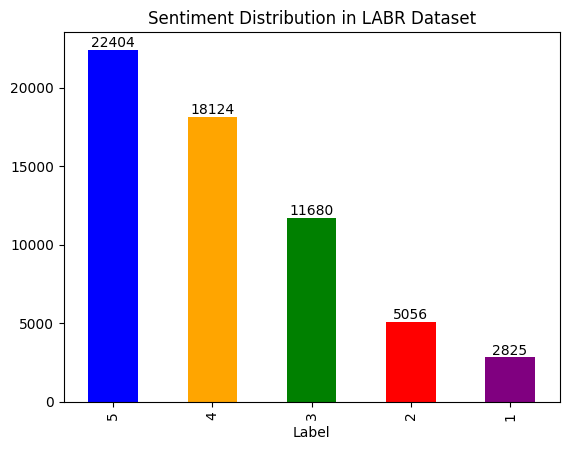

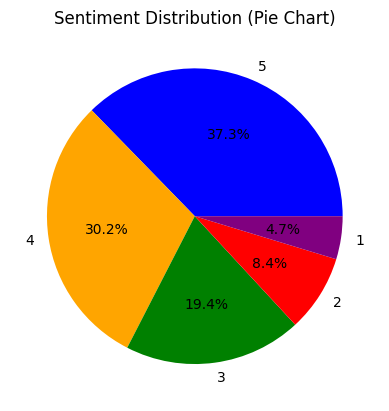

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define a list of colors for the 5 ratings
colors = ["blue", "orange", "green", "red", "purple"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in LABR Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position (v + 0.05) if needed

#plt.savefig("bar_chart.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart)")
plt.ylabel("")
#plt.savefig("pie_chart.png")
print("\n")
plt.show()


In [11]:
# Filter out rows with ratings 3
df = df[df["Label"].isin([1, 2, 4, 5])]

# Rename the ratings
df["Label"] = df["Label"].replace({5: "POS", 4:"POS", 1: "NEG", 2: "NEG"})

<ipython-input-11-0845cd27fa88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Label"] = df["Label"].replace({5: "POS", 4:"POS", 1: "NEG", 2: "NEG"})


Sentiment Distribution:
 Label
POS    40528
NEG     7881
Name: count, dtype: int64


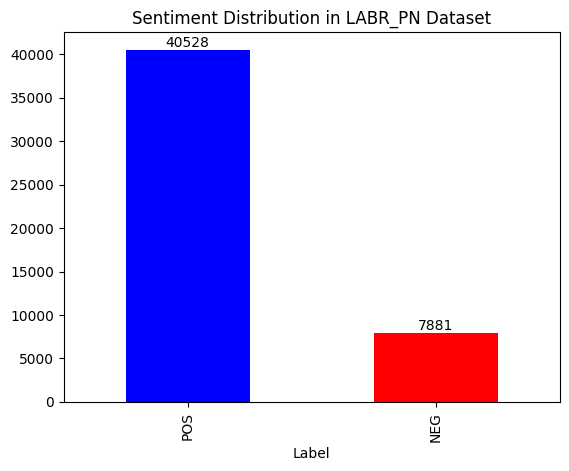

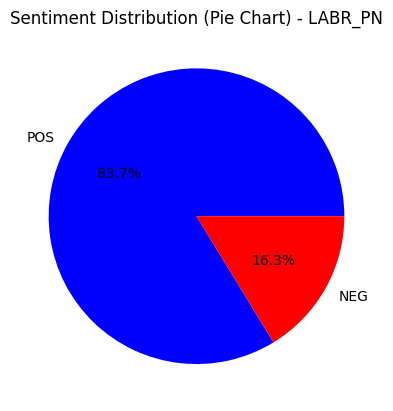

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 2 ratings
colors = ["blue", "red"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in LABR_PN Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart_pn.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart) - LABR_PN")
plt.ylabel("")
#plt.savefig("pie_chart_pn.png")
print("\n")
plt.show()


In [13]:
# Replace POS with 1 and NEG with 0 in the 'Label' column
df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})

# Save the new dataset
df.to_csv("LABR.csv", index=False, encoding="utf-8")

print("Updated dataset saved as LABR.csv")


<ipython-input-13-294788dac904>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})


Updated dataset saved as LABR.csv


### **Pretraitement**

In [14]:
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.isri import ISRIStemmer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
def remove_non_arabic(text):
    if isinstance(text, str):
        return re.sub(r'[^\u0620-\u064A\s]', ' ', text)
    return ''

def tokenization(text):
    if isinstance(text, str):
        return re.findall(r'\S+', text)  # Matches sequences of non-space characters
    return []

def remove_arabic_stopwords(tokens):
    arabic_stopwords = set(stopwords.words("arabic"))  # Convert to set for faster lookup
    return [token for token in tokens if token not in arabic_stopwords]

def get_root(word, stemmer):
    if isinstance(word, str):
        return stemmer.stem(word)
    return word

def stemming_AR(tokens):
    stemmer = ISRIStemmer()
    return [get_root(token, stemmer) for token in tokens]

def rejoin_tokens(tokens):
    filtered_tokens = [token for token in tokens if isinstance(token, str) and token.strip()]
    return ' '.join(filtered_tokens)

In [16]:
def LABR_pretraitement(text):
    if isinstance(text, str):

        # Step 1: Remove non-arabic characters
        text = remove_non_arabic(text)

        # Step 2: Tokenization (split text into tokens)
        tokens = tokenization(text)

        # Step 3: Remove Arabic stopwords
        tokens = remove_arabic_stopwords(tokens)

        # Step 4: Apply stemming (ISRI Stemmer for Arabic)
        tokens = stemming_AR(tokens)

        # Step 5: Rejoin tokens into a single string
        return rejoin_tokens(tokens)

    return ''

In [17]:
print(f"Start processing LABR ...\n")
LABR = pd.read_csv("/content/LABR.csv")
LABR["Text"] = [LABR_pretraitement(text) for text in df["Text"]]
LABR.to_csv("/content/LABR_Pre.csv", index=False)
print(f"Finished processing LABR!\n")

Start processing LABR ...

Finished processing LABR!



In [18]:
from sklearn.utils import resample
import pandas as pd

# Load your original dataset
df = pd.read_csv('LABR_Pre.csv', encoding='utf-8-sig')

# Drop NaNs
df = df.dropna(subset=['Text']).reset_index(drop=True)

# Separate classes
df_majority = df[df['Label'] == 1]
df_minority = df[df['Label'] == 0]

# Oversample minority
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_majority, df_minority_oversampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df_balanced.to_csv('LABR_Pre_Blc.csv', index=False, encoding='utf-8-sig')

print("Balanced text data saved to 'balanced_text_data.csv'")

Balanced text data saved to 'balanced_text_data.csv'


### **Balancing**

In [19]:
from sklearn.utils import resample
import pandas as pd

# Load your original dataset
df = pd.read_csv('LABR.csv', encoding='utf-8-sig')

# Drop NaNs
df = df.dropna(subset=['Text']).reset_index(drop=True)

# Separate classes
df_majority = df[df['Label'] == 1]
df_minority = df[df['Label'] == 0]

# Oversample minority
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_majority, df_minority_oversampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df_balanced.to_csv('LABR_Blc.csv', index=False, encoding='utf-8-sig')

print("Balanced text data saved to 'LABR_BLC.csv'")



# Load your original dataset
df = pd.read_csv('LABR_Pre.csv', encoding='utf-8-sig')

# Drop NaNs
df = df.dropna(subset=['Text']).reset_index(drop=True)

# Separate classes
df_majority = df[df['Label'] == 1]
df_minority = df[df['Label'] == 0]

# Oversample minority
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_majority, df_minority_oversampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df_balanced.to_csv('LABR_Pre_Blc.csv', index=False, encoding='utf-8-sig')

print("Balanced text data saved to 'LABR_Pre_Blc.csv'")

Balanced text data saved to 'LABR_BLC.csv'
Balanced text data saved to 'LABR_Pre_Blc.csv'


# Set up : Algorithms Functions

### Libraries

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

### **Visualisation / Metrics**

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_results(confusion_matrix, y_test, y_pred, dataset_name, algorithm_name, execution_time, num_positive, num_negative):
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]

    epsilon = 1e-10
    accuracy = (TP + TN) / (TP + TN + FP + FN + epsilon)

    # Per-class metrics
    precision_per_class = precision_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    recall_per_class = recall_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    support_0 = sum(y_test == 0)
    support_1 = sum(y_test == 1)

    # Prepare result dict (optional to return it)
    results = {
        "Dataset": dataset_name,
        "Algorithm": algorithm_name,
        "Confusion Matrix": confusion_matrix,
        "Accuracy": round(accuracy, 4),
        "Precision_0": round(precision_per_class[0], 4),
        "Recall_0": round(recall_per_class[0], 4),
        "F1_0": round(f1_per_class[0], 4),
        "Support_0": support_0,
        "Precision_1": round(precision_per_class[1], 4),
        "Recall_1": round(recall_per_class[1], 4),
        "F1_1": round(f1_per_class[1], 4),
        "Support_1": support_1,
        "Number of Positive Samples": num_positive,
        "Number of Negative Samples": num_negative,
        "Execution Time (s)": round(execution_time, 4)
    }

    # --- Visualization ---
    title = f"{dataset_name} with {algorithm_name}"
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), gridspec_kw={'width_ratios': [1, 1.1]})
    fig.suptitle(title, fontsize=14, fontweight='bold')

    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
                square=True, linewidths=0, linecolor='white')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.set_title('Confusion Matrix', fontsize=12)
    ax1.set_xticklabels(['Negative', 'Positive'])
    ax1.set_yticklabels(['Negative', 'Positive'])

    ax2.axis('off')
    ax2.set_title('Statistics Summary', fontsize=12, fontweight='bold', loc='left')

    stats_text = [
        f"Accuracy: {results['Accuracy']}",
        f"Execution Time: {execution_time:.2f} sec",
        f"Training Positives: {num_positive}",
        f"Training Negatives: {num_negative}"
    ]
    y_text = 0.95
    for line in stats_text:
        ax2.text(0.01, y_text, line, fontsize=11, va='top')
        y_text -= 0.07

    col_labels = ['Precision', 'Recall', 'F1 Score', 'Support']
    row_labels = ['Class 0 (Neg)', 'Class 1 (Pos)']
    cell_data = [
        [results['Precision_0'], results['Recall_0'], results['F1_0'], results['Support_0']],
        [results['Precision_1'], results['Recall_1'], results['F1_1'], results['Support_1']]
    ]
    table = ax2.table(
        cellText=cell_data,
        rowLabels=row_labels,
        colLabels=col_labels,
        cellLoc='center',
        colLoc='center',
        loc='center',
        bbox=[0.01, 0.05, 0.9, 0.3]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(0.95, 1.0)

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

    return results


### **Vectorize**

In [4]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

def vectorize_text_data(csv_path, sample_percentage=1.0):
    df = pd.read_csv(csv_path, encoding='utf-8-sig')
    df = df[df['Text'].notna() & (df['Text'] != "")]

    if sample_percentage < 1.0:
        df = df.sample(frac=sample_percentage, random_state=42).reset_index(drop=True)

    X = df['Text']
    y = df['Label']

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    return X_train_tfidf, X_test_tfidf, y_train, y_test, df

### **Traitement**

In [5]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

def run_model_on_vectorized_data(X_train_tfidf, X_test_tfidf, y_train, y_test, df, model_class, model_name, dataset_name, model_params=None):
    # Create and Train Model
    model = model_class(**(model_params or {}))
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    execution_time = time.time() - start_time

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics
    results = analyze_and_visualize_results(
        confusion_matrix=cm,
        y_test=y_test,
        y_pred=y_pred,
        dataset_name=dataset_name,
        algorithm_name=model_name,
        execution_time=execution_time,
        num_positive=len(df[df['Label'] == 1]),
        num_negative=len(df[df['Label'] == 0])
    )

    return results


### **Hyper Parameter Testing Function (one datasets)**

In [6]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import time

def test_model_with_param_from_vectorized_data(X_train_tfidf, X_test_tfidf, y_train, y_test, df, model_class, param_name, param_values, dataset_label="Dataset"):
    print("\n\n")
    f1_scores_class_0 = []
    f1_scores_class_1 = []
    avg_f1_scores = []
    valid_param_values = []

    for value in param_values:
        try:
            model = model_class(**{param_name: value})
            start_time = time.time()
            model.fit(X_train_tfidf, y_train)
            y_pred = model.predict(X_test_tfidf)
            exec_time = time.time() - start_time

            f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1])
            f1_scores_class_0.append(f1_per_class[0])
            f1_scores_class_1.append(f1_per_class[1])
            avg = (f1_per_class[0] + f1_per_class[1]) / 2
            avg_f1_scores.append(avg)
            valid_param_values.append(value)

            print(f"{param_name}: {value} | F1[0]: {round(f1_per_class[0], 4)} | F1[1]: {round(f1_per_class[1], 4)} | Avg F1: {round(avg, 4)} | Time: {round(exec_time, 4)}s")

        except Exception as e:
            print(f"Skipping {param_name} = {value} due to error: {e}")

    if not valid_param_values:
        print(" No successful parameter values to display.")
        return None  # Explicit return when nothing worked

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(valid_param_values, f1_scores_class_0, marker='o', linestyle='--', color='red', label='F1 Score - Class 0 (Negative)')
    plt.plot(valid_param_values, f1_scores_class_1, marker='o', linestyle='-', color='blue', label='F1 Score - Class 1 (Positive)')
    plt.title(f'{dataset_label}\nF1 Score vs {param_name}', fontsize=14, fontweight='bold')
    plt.xlabel(param_name)
    plt.ylabel('F1 Score')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Summary
    best_idx = avg_f1_scores.index(max(avg_f1_scores))
    best_param = valid_param_values[best_idx]
    best_score = avg_f1_scores[best_idx]

    print(f"\nBest {param_name} = {best_param} with Avg F1 = {round(best_score, 4)}")

    return best_param  # returns the best value

### **Victorize all data**

In [7]:
# === Global table to store results from all algorithms
all_Algo_results = pd.DataFrame()

# === Step 0: Load and vectorize datasets
X_train1, X_test1, y_train1, y_test1, df1 = vectorize_text_data("LABR.csv")
X_train2, X_test2, y_train2, y_test2, df2 = vectorize_text_data("LABR_Blc.csv")
X_train3, X_test3, y_train3, y_test3, df3 = vectorize_text_data("LABR_Pre.csv")
X_train4, X_test4, y_train4, y_test4, df4 = vectorize_text_data("LABR_Pre_Blc.csv")

datasets = {
    "LABR":                         (X_train1, X_test1, y_train1, y_test1, df1),
    "LABR_Balanced":               (X_train2, X_test2, y_train2, y_test2, df2),
    "LABR_Preprocessed":           (X_train3, X_test3, y_train3, y_test3, df3),
    "LABR_Preprocessed_Balanced":  (X_train4, X_test4, y_train4, y_test4, df4)
}


# LABR Dataset - Full Comparison of 8 Algorithms

## **Multinomial Naive Bayes**


=== Step 1: MultinomialNB with DEFAULT parameters ===


-- Running default model on LABR --


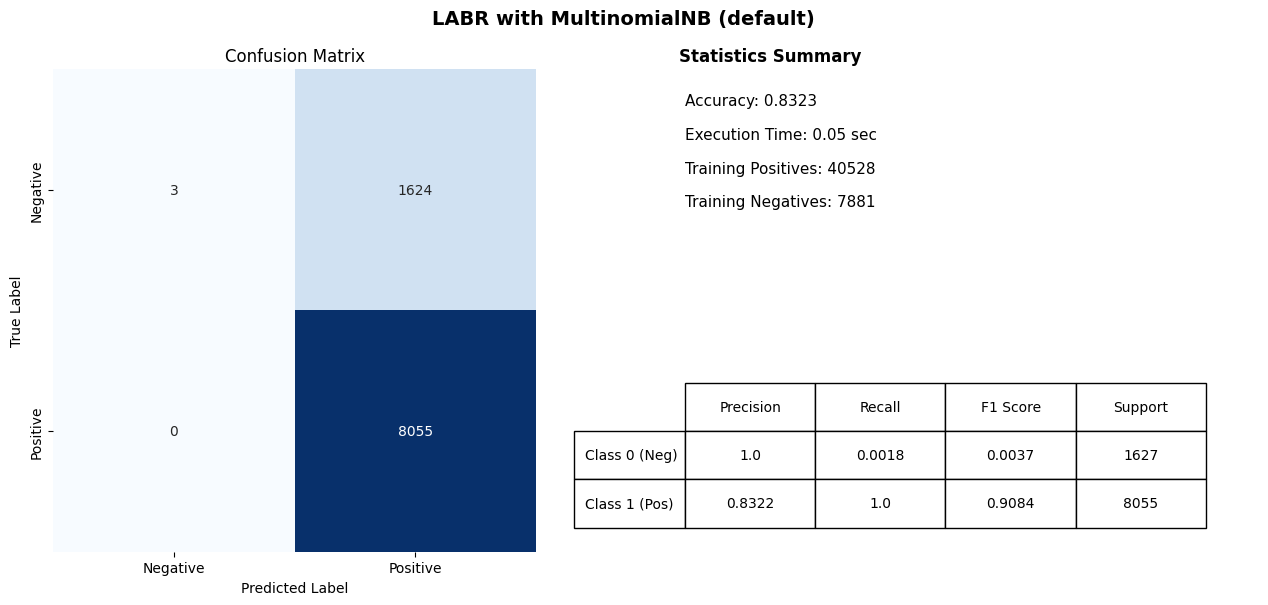


-- Running default model on LABR_Balanced --


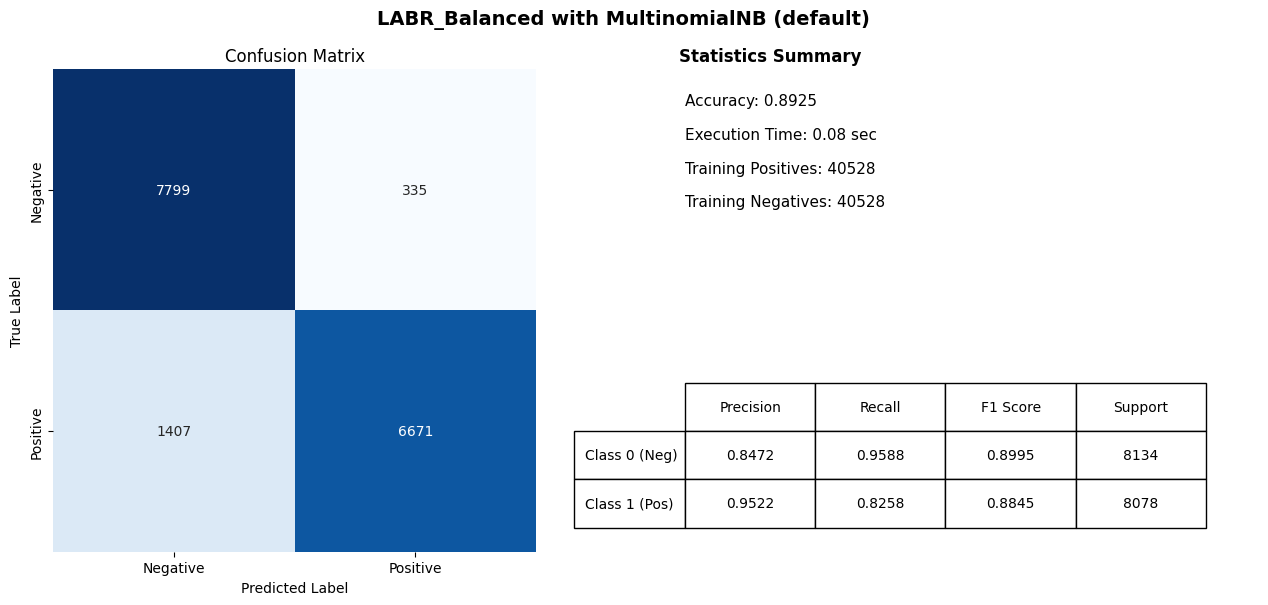


-- Running default model on LABR_Preprocessed --


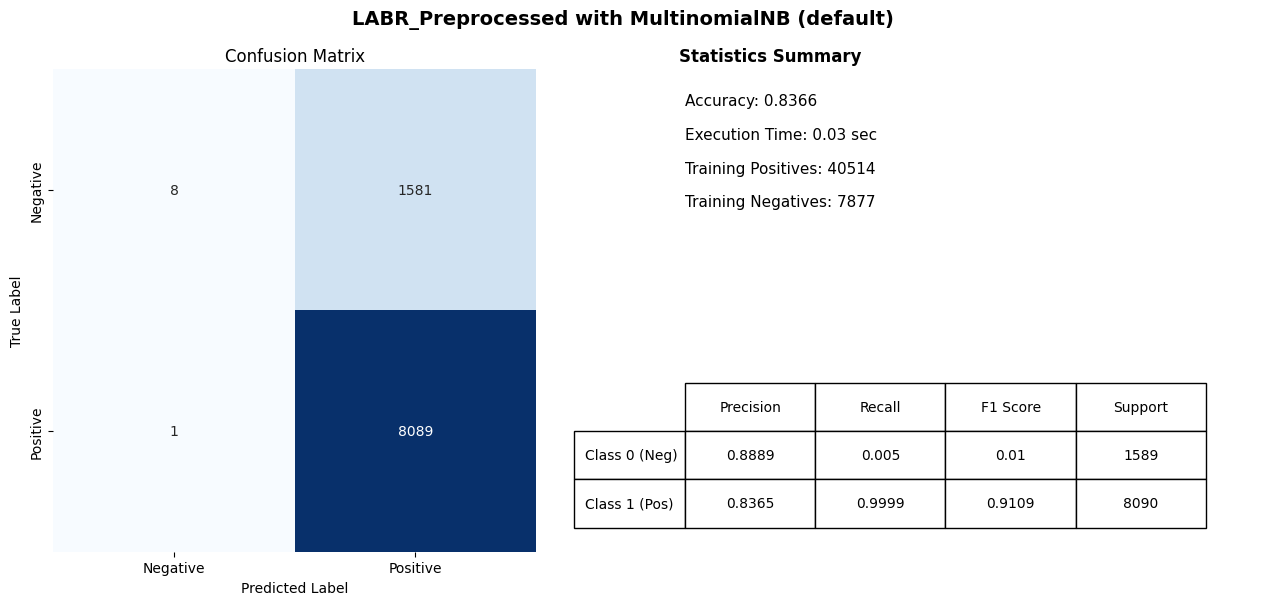


-- Running default model on LABR_Preprocessed_Balanced --


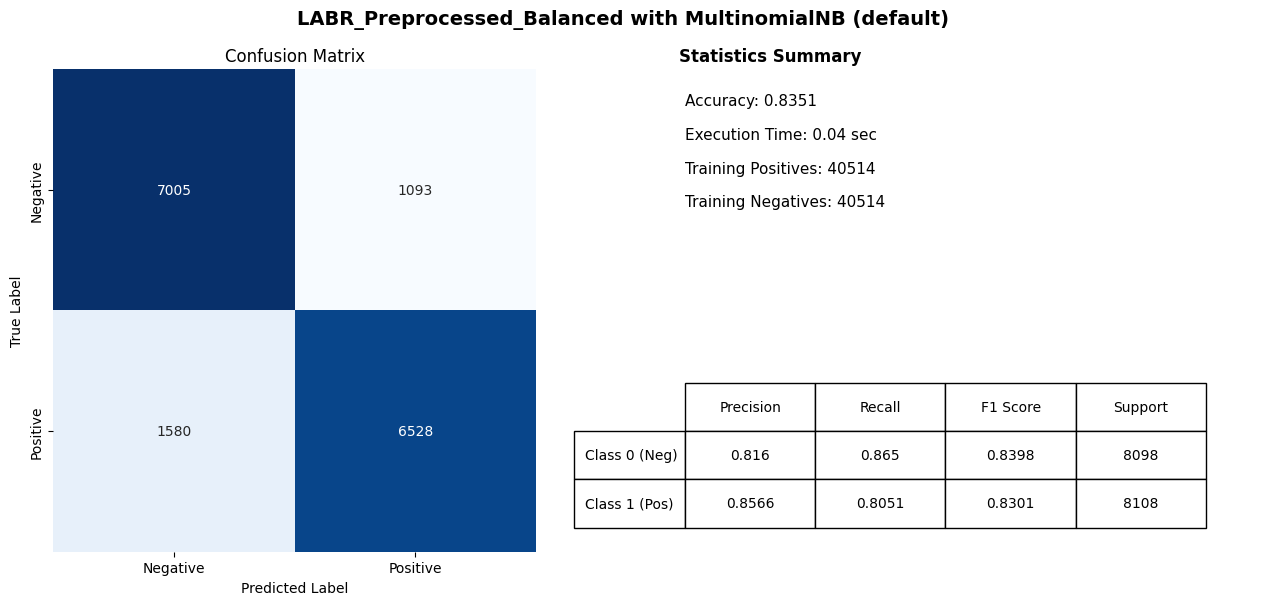


=== Step 2: Tuning alpha for MultinomialNB ===


-- Tuning LABR --



alpha: 0.0001 | F1[0]: 0.307 | F1[1]: 0.9164 | Avg F1: 0.6117 | Time: 0.0524s
alpha: 0.01 | F1[0]: 0.378 | F1[1]: 0.9231 | Avg F1: 0.6505 | Time: 0.0386s
alpha: 0.05 | F1[0]: 0.3044 | F1[1]: 0.9212 | Avg F1: 0.6128 | Time: 0.0391s
alpha: 0.1 | F1[0]: 0.1905 | F1[1]: 0.9162 | Avg F1: 0.5534 | Time: 0.0376s
alpha: 0.5 | F1[0]: 0.0183 | F1[1]: 0.909 | Avg F1: 0.4637 | Time: 0.0456s
alpha: 1.0 | F1[0]: 0.0037 | F1[1]: 0.9084 | Avg F1: 0.4561 | Time: 0.039s
alpha: 2.0 | F1[0]: 0.0012 | F1[1]: 0.9083 | Avg F1: 0.4548 | Time: 0.058s
alpha: 5.0 | F1[0]: 0.0 | F1[1]: 0.9083 | Avg F1: 0.4541 | Time: 0.0442s
alpha: 10.0 | F1[0]: 0.0 | F1[1]: 0.9083 | Avg F1: 0.4541 | Time: 0.0447s


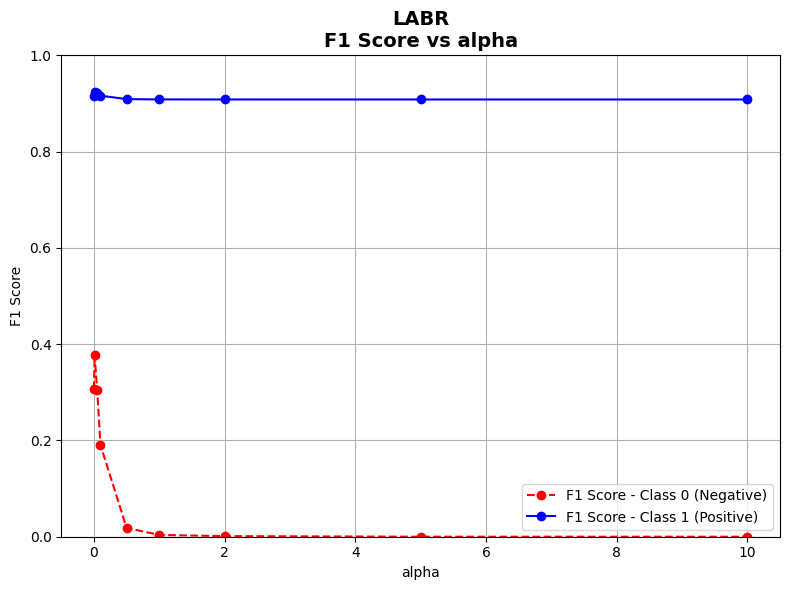


Best alpha = 0.01 with Avg F1 = 0.6505

-- Tuning LABR_Balanced --



alpha: 0.0001 | F1[0]: 0.944 | F1[1]: 0.94 | Avg F1: 0.942 | Time: 0.0666s
alpha: 0.01 | F1[0]: 0.9393 | F1[1]: 0.9344 | Avg F1: 0.9369 | Time: 0.061s
alpha: 0.05 | F1[0]: 0.9336 | F1[1]: 0.9274 | Avg F1: 0.9305 | Time: 0.0608s
alpha: 0.1 | F1[0]: 0.9291 | F1[1]: 0.9219 | Avg F1: 0.9255 | Time: 0.0656s
alpha: 0.5 | F1[0]: 0.9107 | F1[1]: 0.8993 | Avg F1: 0.905 | Time: 0.0626s
alpha: 1.0 | F1[0]: 0.8995 | F1[1]: 0.8845 | Avg F1: 0.892 | Time: 0.0649s
alpha: 2.0 | F1[0]: 0.8882 | F1[1]: 0.8691 | Avg F1: 0.8787 | Time: 0.0598s
alpha: 5.0 | F1[0]: 0.872 | F1[1]: 0.8466 | Avg F1: 0.8593 | Time: 0.068s
alpha: 10.0 | F1[0]: 0.8584 | F1[1]: 0.8267 | Avg F1: 0.8425 | Time: 0.0673s


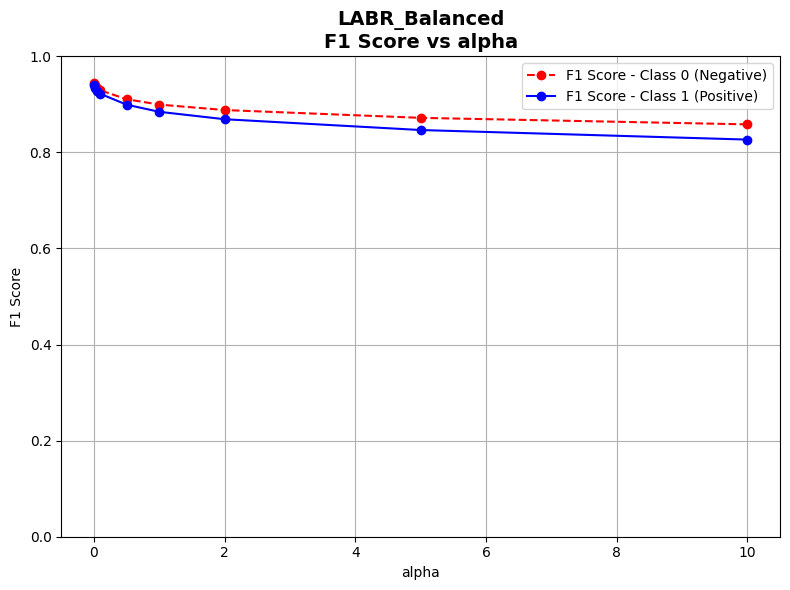


Best alpha = 0.0001 with Avg F1 = 0.942

-- Tuning LABR_Preprocessed --



alpha: 0.0001 | F1[0]: 0.258 | F1[1]: 0.9185 | Avg F1: 0.5882 | Time: 0.0254s
alpha: 0.01 | F1[0]: 0.2583 | F1[1]: 0.9198 | Avg F1: 0.5891 | Time: 0.0178s
alpha: 0.05 | F1[0]: 0.2297 | F1[1]: 0.9192 | Avg F1: 0.5745 | Time: 0.0177s
alpha: 0.1 | F1[0]: 0.1866 | F1[1]: 0.9177 | Avg F1: 0.5522 | Time: 0.018s
alpha: 0.5 | F1[0]: 0.0407 | F1[1]: 0.9122 | Avg F1: 0.4764 | Time: 0.0175s
alpha: 1.0 | F1[0]: 0.01 | F1[1]: 0.9109 | Avg F1: 0.4605 | Time: 0.0175s
alpha: 2.0 | F1[0]: 0.0025 | F1[1]: 0.9106 | Avg F1: 0.4566 | Time: 0.0176s
alpha: 5.0 | F1[0]: 0.0013 | F1[1]: 0.9106 | Avg F1: 0.4559 | Time: 0.0179s
alpha: 10.0 | F1[0]: 0.0 | F1[1]: 0.9106 | Avg F1: 0.4553 | Time: 0.0189s


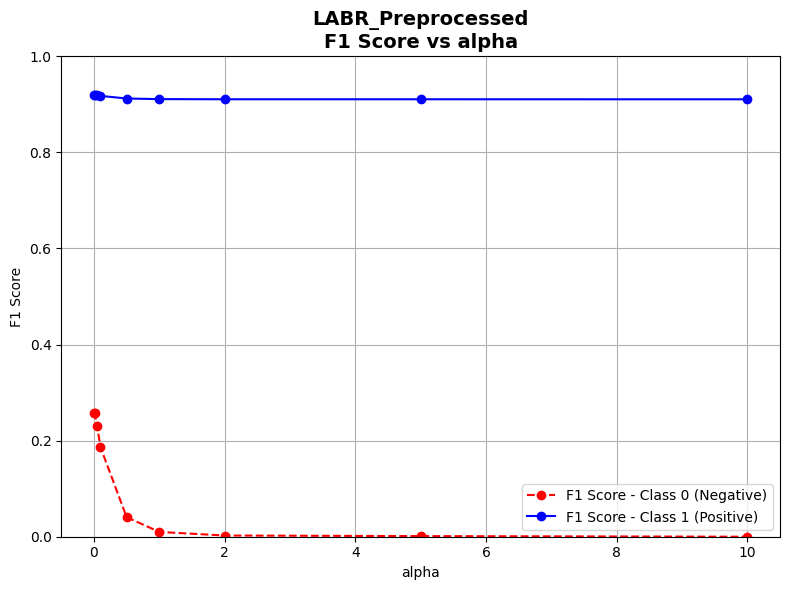


Best alpha = 0.01 with Avg F1 = 0.5891

-- Tuning LABR_Preprocessed_Balanced --



alpha: 0.0001 | F1[0]: 0.866 | F1[1]: 0.8569 | Avg F1: 0.8614 | Time: 0.0355s
alpha: 0.01 | F1[0]: 0.8634 | F1[1]: 0.8545 | Avg F1: 0.8589 | Time: 0.0315s
alpha: 0.05 | F1[0]: 0.8594 | F1[1]: 0.8506 | Avg F1: 0.855 | Time: 0.0298s
alpha: 0.1 | F1[0]: 0.8561 | F1[1]: 0.8471 | Avg F1: 0.8516 | Time: 0.0285s
alpha: 0.5 | F1[0]: 0.8441 | F1[1]: 0.8348 | Avg F1: 0.8395 | Time: 0.0285s
alpha: 1.0 | F1[0]: 0.8398 | F1[1]: 0.8301 | Avg F1: 0.8349 | Time: 0.0335s
alpha: 2.0 | F1[0]: 0.836 | F1[1]: 0.826 | Avg F1: 0.831 | Time: 0.0292s
alpha: 5.0 | F1[0]: 0.827 | F1[1]: 0.818 | Avg F1: 0.8225 | Time: 0.0271s
alpha: 10.0 | F1[0]: 0.8209 | F1[1]: 0.8121 | Avg F1: 0.8165 | Time: 0.0272s


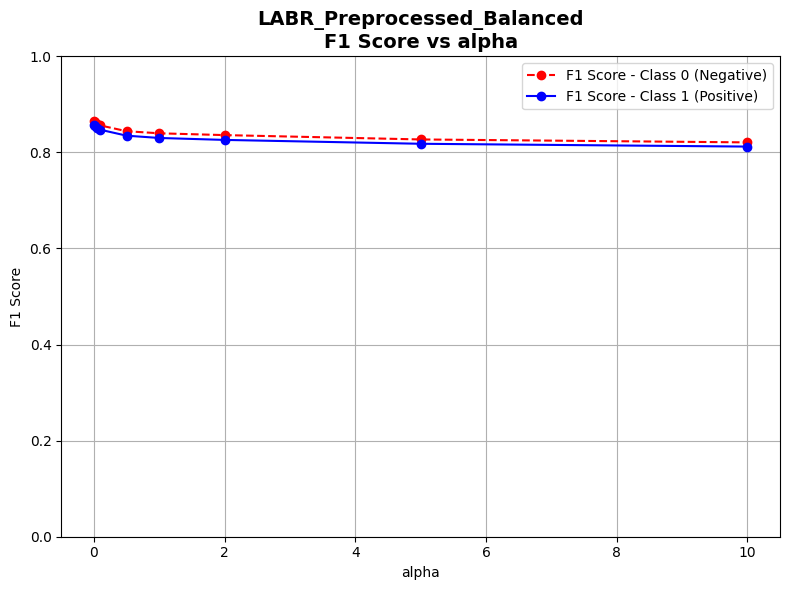


Best alpha = 0.0001 with Avg F1 = 0.8614

=== Step 3: MultinomialNB with BEST alpha ===


-- LABR with best alpha = 0.01 --


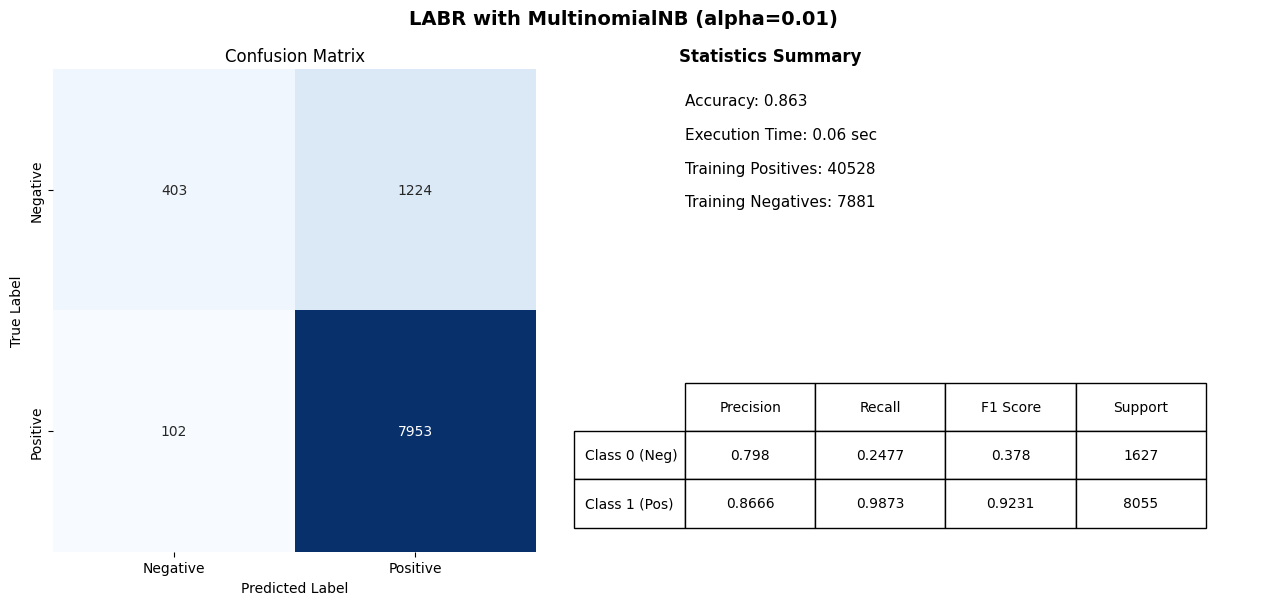


-- LABR_Balanced with best alpha = 0.0001 --


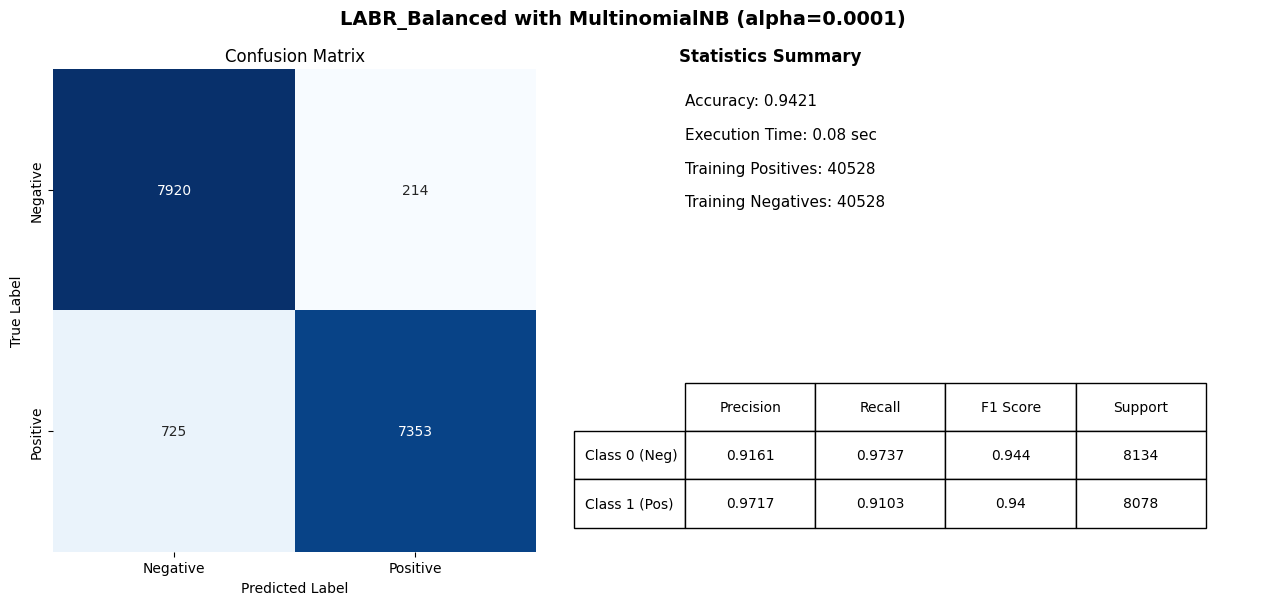


-- LABR_Preprocessed with best alpha = 0.01 --


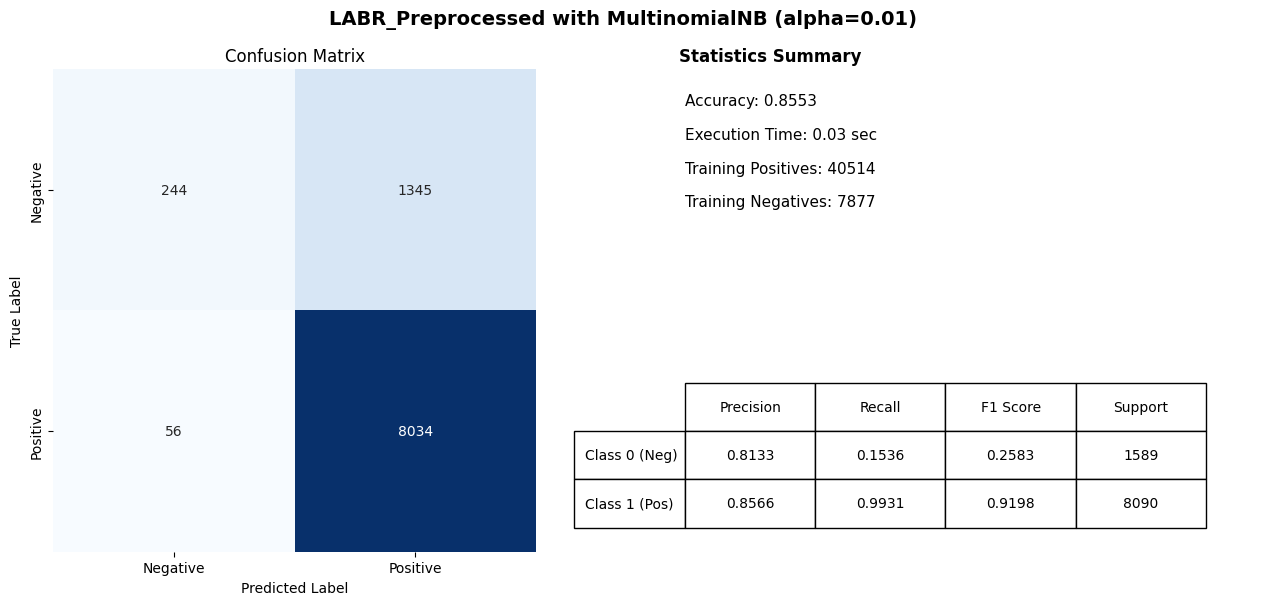


-- LABR_Preprocessed_Balanced with best alpha = 0.0001 --


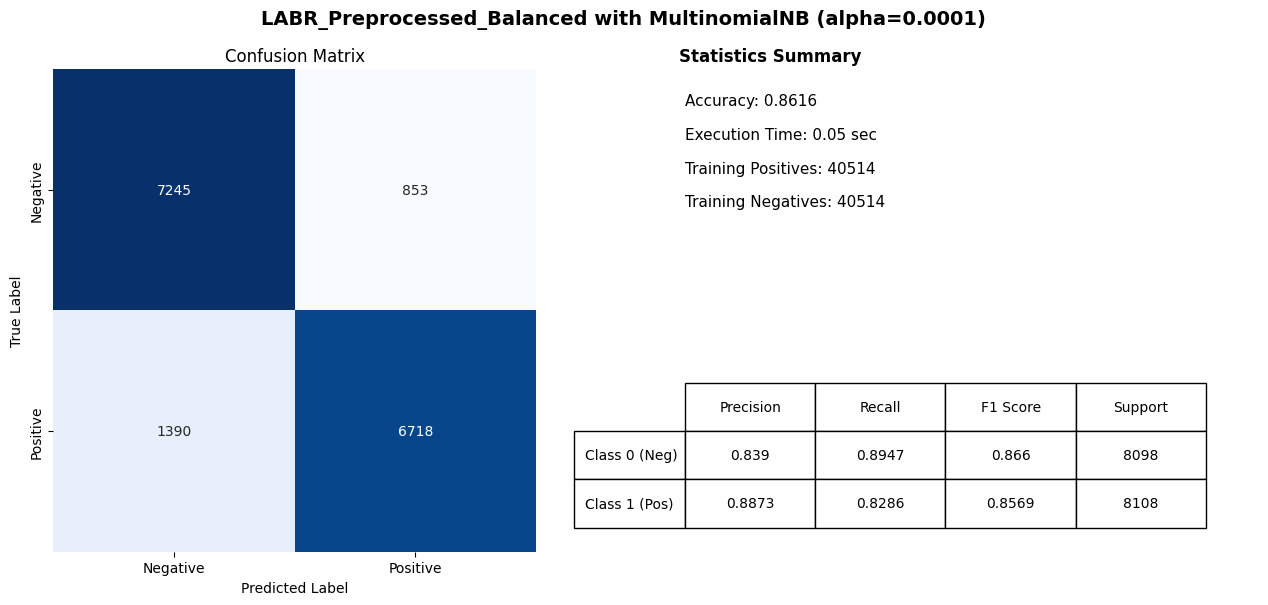

Results saved to 'MultinomialNB_Results.csv'


In [8]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

param_values = [0.0001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_MNB_results = []

# === Step 1: Run MultinomialNB with default alpha
print("\n=== Step 1: MultinomialNB with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        model_name="MultinomialNB (default)",
        dataset_name=label
    )
    result["Model Group"] = "MultinomialNB"
    all_MNB_results.append(result)

# === Step 2: Hyperparameter tuning
print("\n=== Step 2: Tuning alpha for MultinomialNB ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_alpha = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        param_name="alpha",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_alpha

# === Step 3: Evaluate using best alpha
print("\n=== Step 3: MultinomialNB with BEST alpha ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_alpha = best_params[label]
    print(f"\n-- {label} with best alpha = {best_alpha} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        model_name=f"MultinomialNB (alpha={best_alpha})",
        dataset_name=label,
        model_params={"alpha": best_alpha}
    )
    result["Model Group"] = "MultinomialNB"
    all_MNB_results.append(result)

# === Save and append to global results
results_df = pd.DataFrame(all_MNB_results)

# Save to individual CSV
results_df.to_csv("MultinomialNB_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'MultinomialNB_Results.csv'")

# Append to master table for all algorithms
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)

## **Complement Naive Bayes**


=== Step 1: ComplementNB with DEFAULT parameters ===


-- Running default model on LABR --


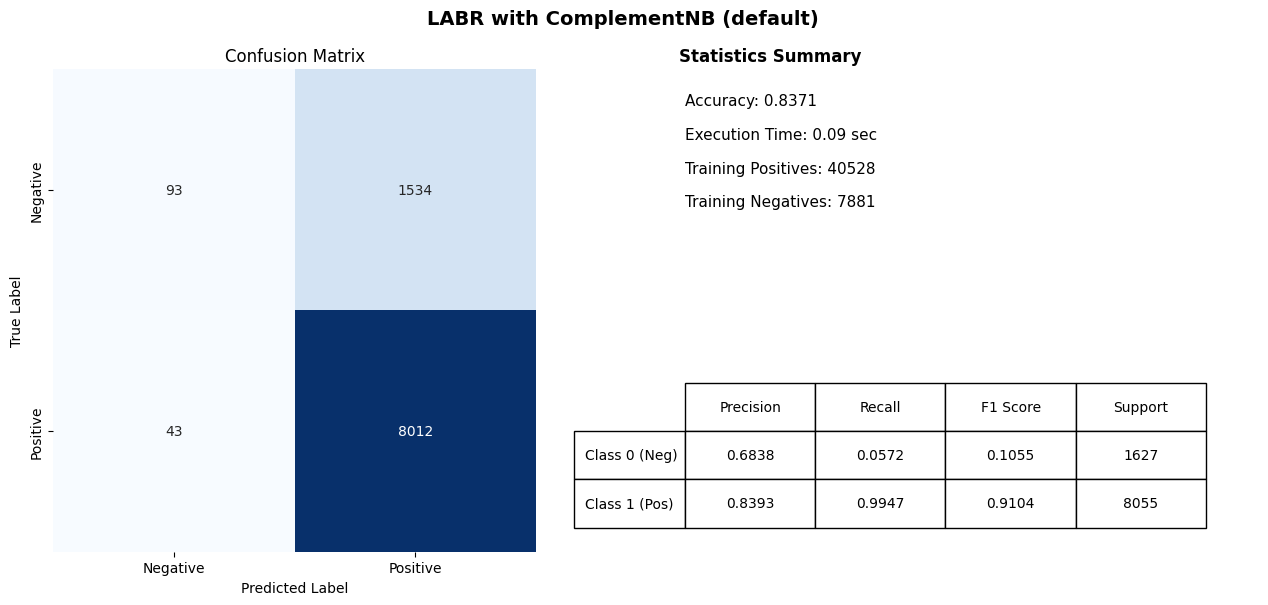


-- Running default model on LABR_Balanced --


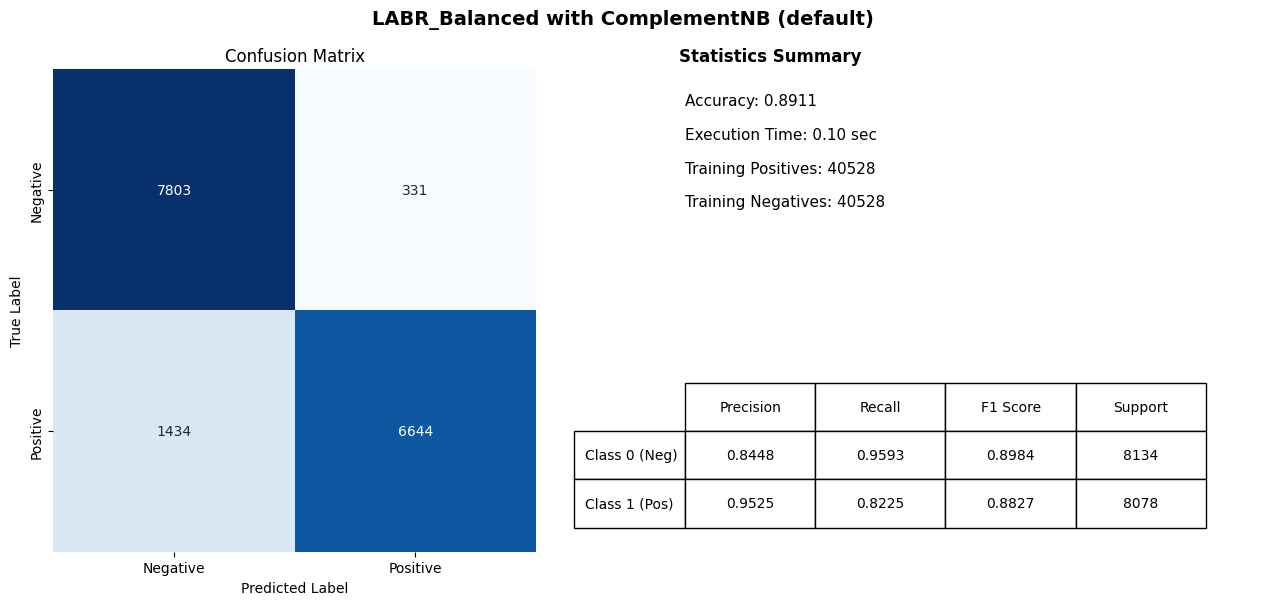


-- Running default model on LABR_Preprocessed --


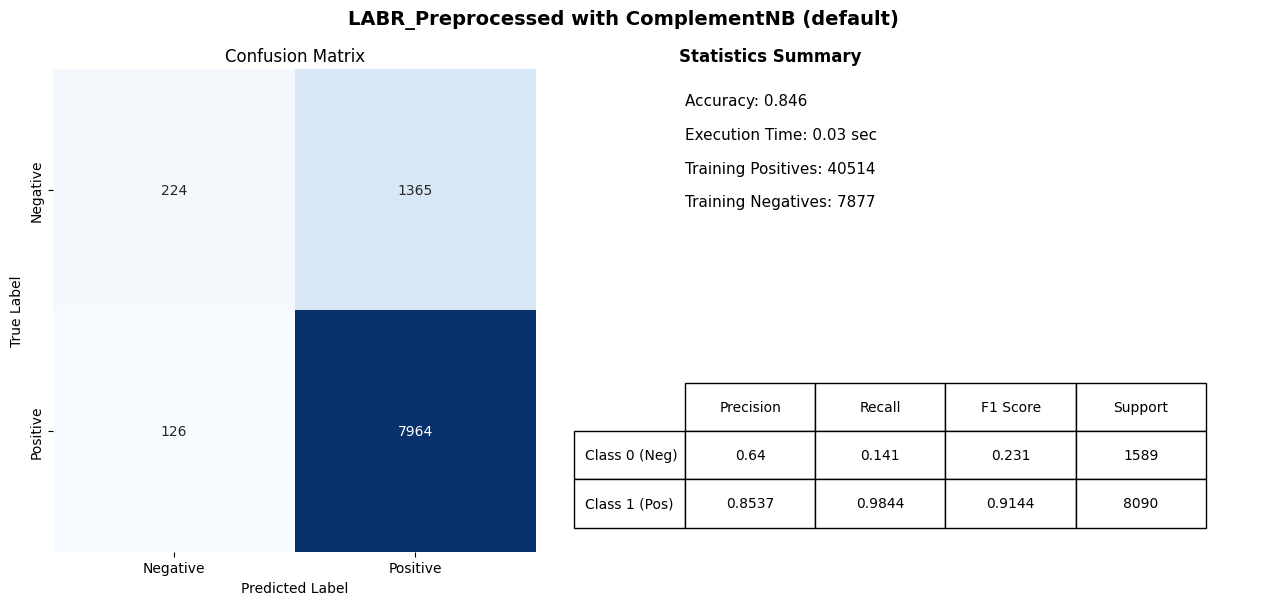


-- Running default model on LABR_Preprocessed_Balanced --


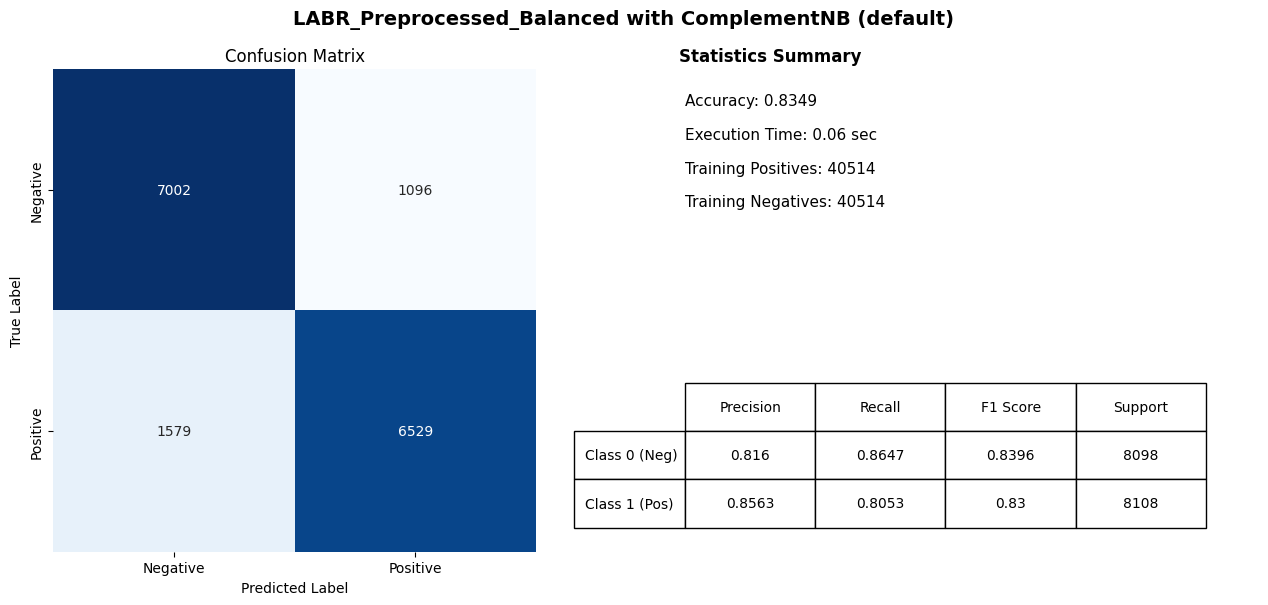


=== Step 2: Tuning alpha for ComplementNB ===


-- Tuning LABR --



alpha: 0.0001 | F1[0]: 0.4315 | F1[1]: 0.8968 | Avg F1: 0.6641 | Time: 0.0992s
alpha: 0.01 | F1[0]: 0.5537 | F1[1]: 0.9024 | Avg F1: 0.728 | Time: 0.0722s
alpha: 0.05 | F1[0]: 0.582 | F1[1]: 0.9139 | Avg F1: 0.748 | Time: 0.0515s
alpha: 0.1 | F1[0]: 0.5609 | F1[1]: 0.9243 | Avg F1: 0.7426 | Time: 0.0412s
alpha: 0.5 | F1[0]: 0.1842 | F1[1]: 0.9124 | Avg F1: 0.5483 | Time: 0.0458s
alpha: 1.0 | F1[0]: 0.1055 | F1[1]: 0.9104 | Avg F1: 0.508 | Time: 0.0419s
alpha: 2.0 | F1[0]: 0.0652 | F1[1]: 0.9089 | Avg F1: 0.487 | Time: 0.0397s
alpha: 5.0 | F1[0]: 0.0378 | F1[1]: 0.9079 | Avg F1: 0.4729 | Time: 0.0607s
alpha: 10.0 | F1[0]: 0.0332 | F1[1]: 0.9076 | Avg F1: 0.4704 | Time: 0.0427s


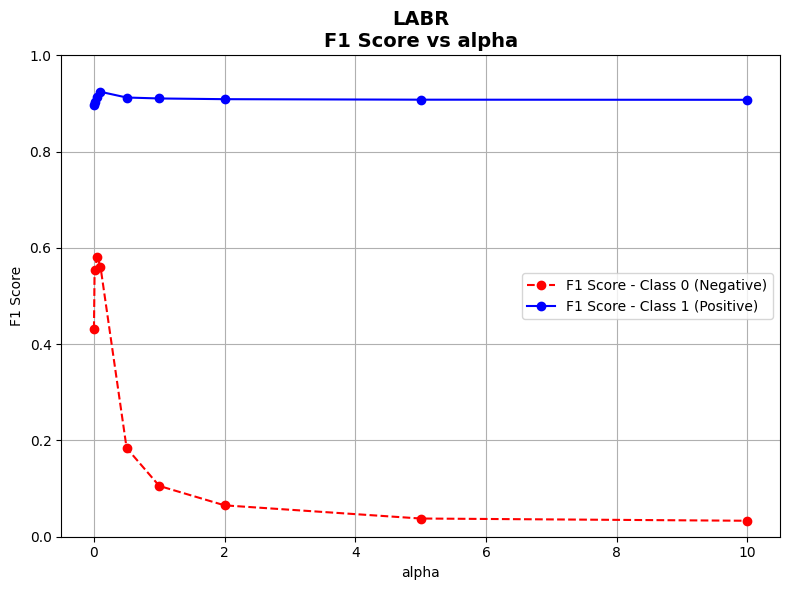


Best alpha = 0.05 with Avg F1 = 0.748

-- Tuning LABR_Balanced --



alpha: 0.0001 | F1[0]: 0.9428 | F1[1]: 0.9384 | Avg F1: 0.9406 | Time: 0.0703s
alpha: 0.01 | F1[0]: 0.9381 | F1[1]: 0.9328 | Avg F1: 0.9354 | Time: 0.061s
alpha: 0.05 | F1[0]: 0.932 | F1[1]: 0.9254 | Avg F1: 0.9287 | Time: 0.0601s
alpha: 0.1 | F1[0]: 0.9278 | F1[1]: 0.9201 | Avg F1: 0.9239 | Time: 0.0647s
alpha: 0.5 | F1[0]: 0.9096 | F1[1]: 0.8977 | Avg F1: 0.9037 | Time: 0.062s
alpha: 1.0 | F1[0]: 0.8984 | F1[1]: 0.8827 | Avg F1: 0.8906 | Time: 0.0615s
alpha: 2.0 | F1[0]: 0.8873 | F1[1]: 0.8673 | Avg F1: 0.8773 | Time: 0.0653s
alpha: 5.0 | F1[0]: 0.8706 | F1[1]: 0.8443 | Avg F1: 0.8575 | Time: 0.059s
alpha: 10.0 | F1[0]: 0.8575 | F1[1]: 0.8248 | Avg F1: 0.8412 | Time: 0.0591s


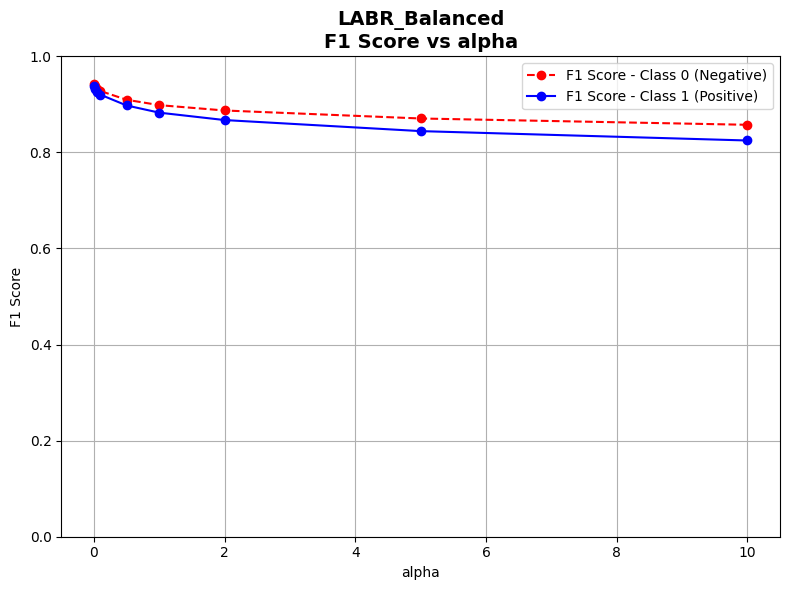


Best alpha = 0.0001 with Avg F1 = 0.9406

-- Tuning LABR_Preprocessed --



alpha: 0.0001 | F1[0]: 0.5014 | F1[1]: 0.8742 | Avg F1: 0.6878 | Time: 0.0379s
alpha: 0.01 | F1[0]: 0.5346 | F1[1]: 0.8785 | Avg F1: 0.7065 | Time: 0.0183s
alpha: 0.05 | F1[0]: 0.5504 | F1[1]: 0.8854 | Avg F1: 0.7179 | Time: 0.018s
alpha: 0.1 | F1[0]: 0.5592 | F1[1]: 0.8968 | Avg F1: 0.728 | Time: 0.0176s
alpha: 0.5 | F1[0]: 0.4244 | F1[1]: 0.919 | Avg F1: 0.6717 | Time: 0.0176s
alpha: 1.0 | F1[0]: 0.231 | F1[1]: 0.9144 | Avg F1: 0.5727 | Time: 0.0185s
alpha: 2.0 | F1[0]: 0.1168 | F1[1]: 0.9115 | Avg F1: 0.5142 | Time: 0.0196s
alpha: 5.0 | F1[0]: 0.0513 | F1[1]: 0.91 | Avg F1: 0.4806 | Time: 0.0172s
alpha: 10.0 | F1[0]: 0.0267 | F1[1]: 0.9093 | Avg F1: 0.468 | Time: 0.03s


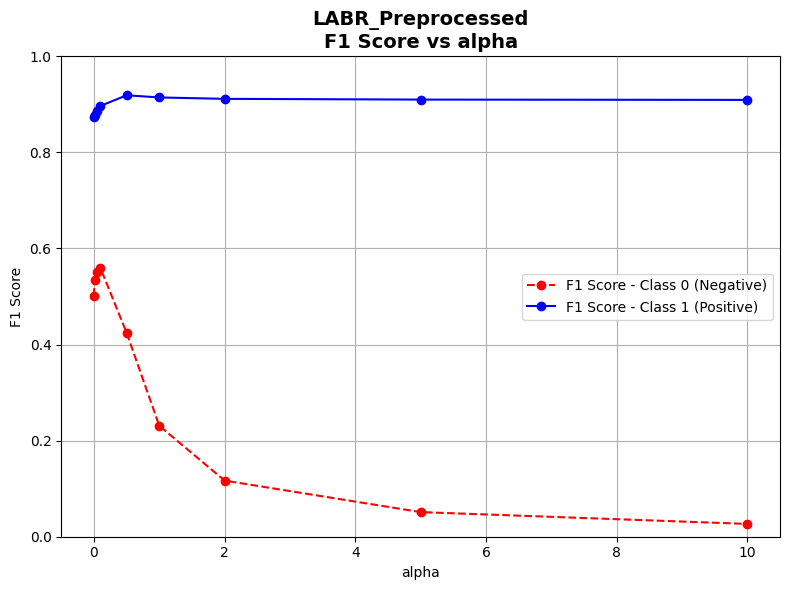


Best alpha = 0.1 with Avg F1 = 0.728

-- Tuning LABR_Preprocessed_Balanced --



alpha: 0.0001 | F1[0]: 0.866 | F1[1]: 0.857 | Avg F1: 0.8615 | Time: 0.0397s
alpha: 0.01 | F1[0]: 0.8634 | F1[1]: 0.8545 | Avg F1: 0.859 | Time: 0.0285s
alpha: 0.05 | F1[0]: 0.8595 | F1[1]: 0.8506 | Avg F1: 0.855 | Time: 0.0292s
alpha: 0.1 | F1[0]: 0.8561 | F1[1]: 0.8471 | Avg F1: 0.8516 | Time: 0.0283s
alpha: 0.5 | F1[0]: 0.8442 | F1[1]: 0.8349 | Avg F1: 0.8396 | Time: 0.0279s
alpha: 1.0 | F1[0]: 0.8396 | F1[1]: 0.83 | Avg F1: 0.8348 | Time: 0.0292s
alpha: 2.0 | F1[0]: 0.836 | F1[1]: 0.826 | Avg F1: 0.831 | Time: 0.0298s
alpha: 5.0 | F1[0]: 0.827 | F1[1]: 0.818 | Avg F1: 0.8225 | Time: 0.0362s
alpha: 10.0 | F1[0]: 0.8209 | F1[1]: 0.8122 | Avg F1: 0.8166 | Time: 0.0284s


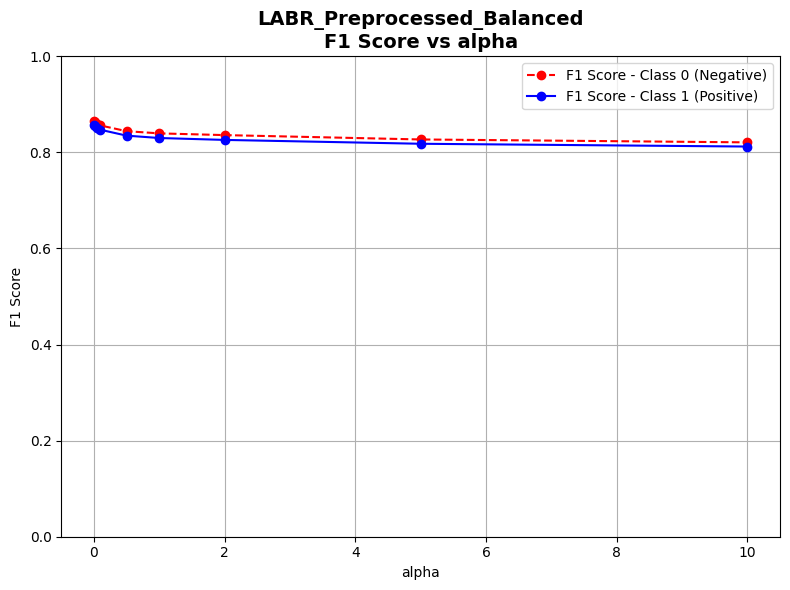


Best alpha = 0.0001 with Avg F1 = 0.8615

=== Step 3: ComplementNB with BEST alpha ===


-- LABR with best alpha = 0.05 --


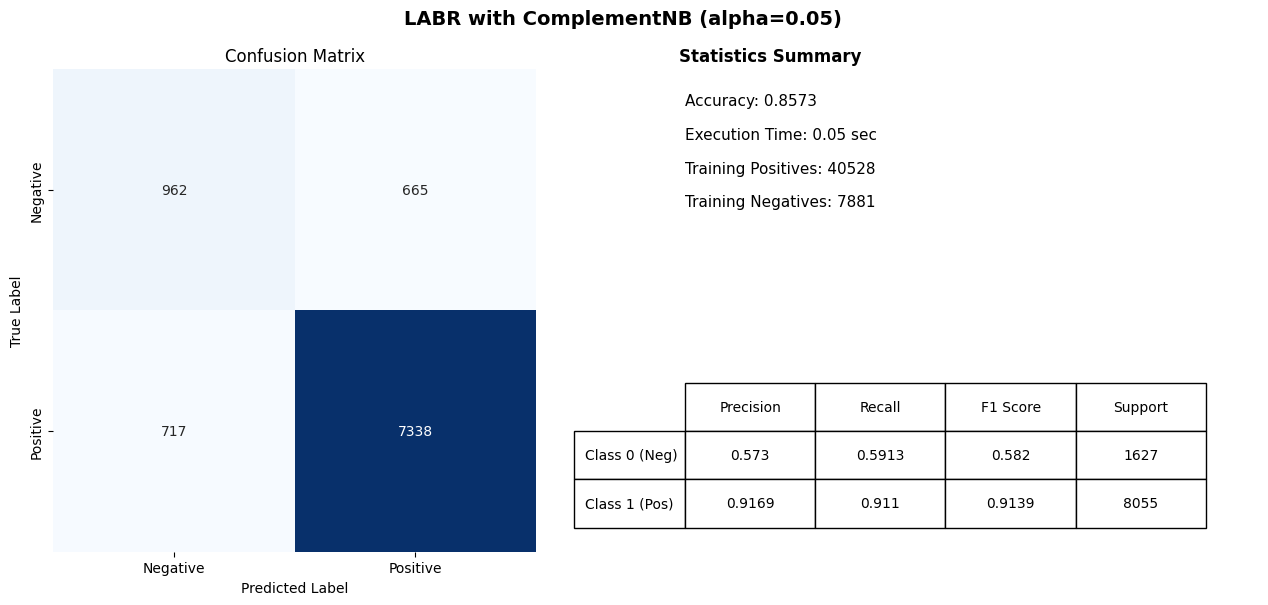


-- LABR_Balanced with best alpha = 0.0001 --


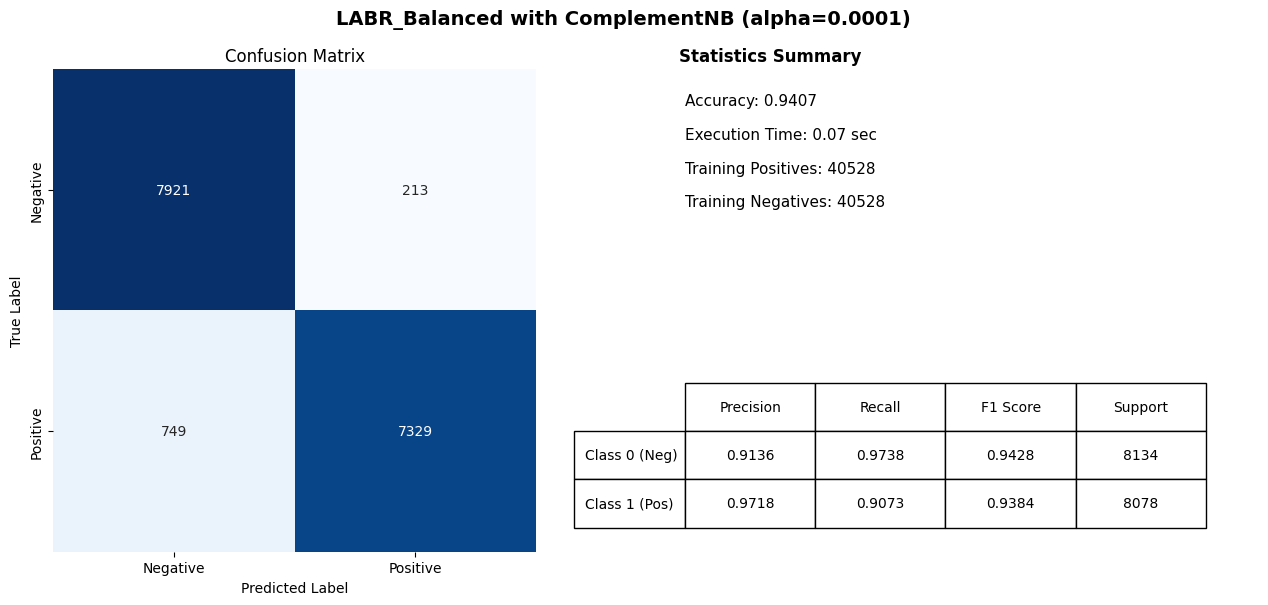


-- LABR_Preprocessed with best alpha = 0.1 --


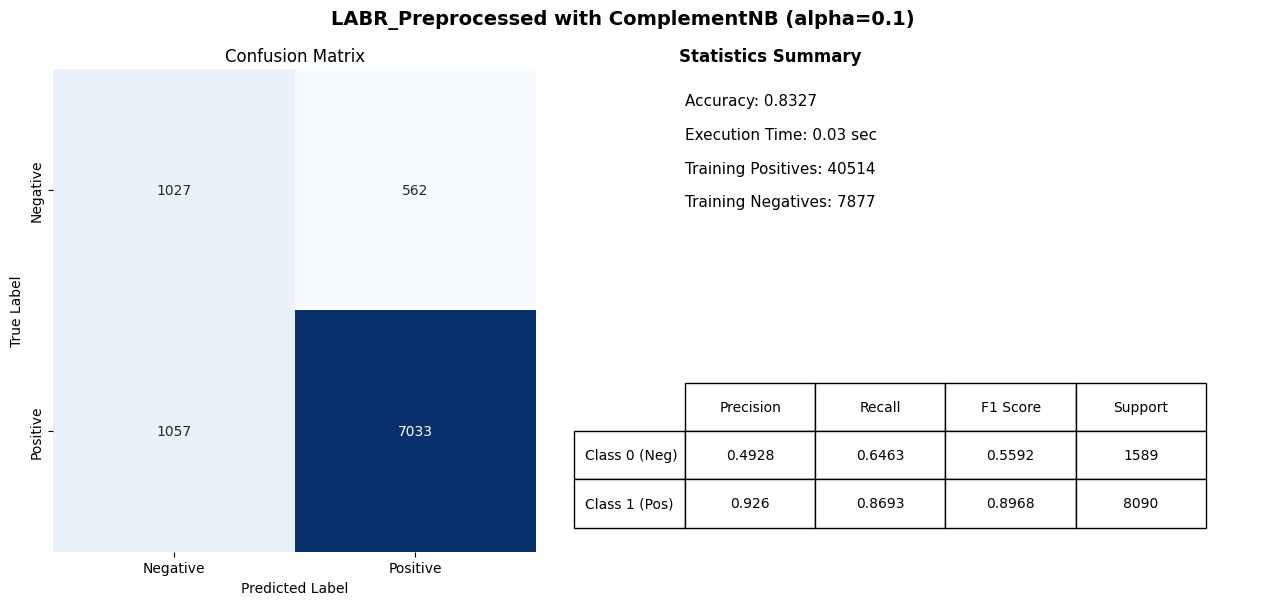


-- LABR_Preprocessed_Balanced with best alpha = 0.0001 --


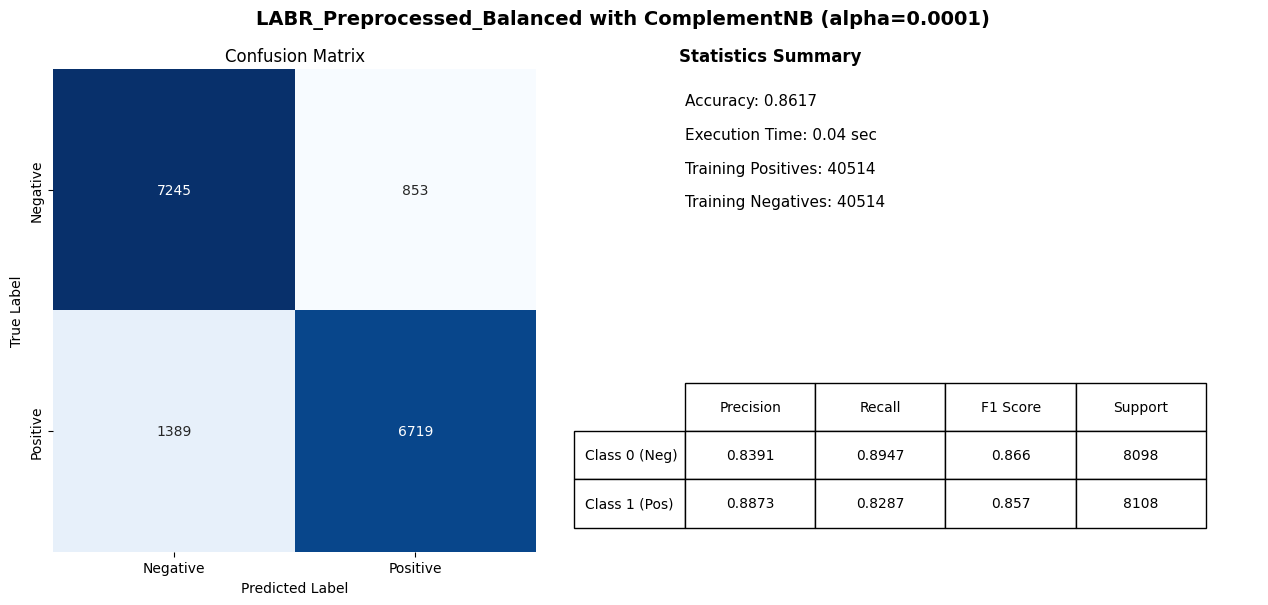

Results saved to 'ComplementNB_Results.csv'


In [9]:
from sklearn.naive_bayes import ComplementNB

param_values = [0.0001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_CNB_results = []

# === Step 1: Run ComplementNB with default alpha
print("\n=== Step 1: ComplementNB with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        model_name="ComplementNB (default)",
        dataset_name=label
    )
    result["Model Group"] = "ComplementNB"
    all_CNB_results.append(result)

# === Step 2: Hyperparameter tuning
print("\n=== Step 2: Tuning alpha for ComplementNB ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_alpha = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        param_name="alpha",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_alpha

# === Step 3: Evaluate using best alpha
print("\n=== Step 3: ComplementNB with BEST alpha ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_alpha = best_params[label]
    print(f"\n-- {label} with best alpha = {best_alpha} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        model_name=f"ComplementNB (alpha={best_alpha})",
        dataset_name=label,
        model_params={"alpha": best_alpha}
    )
    result["Model Group"] = "ComplementNB"
    all_CNB_results.append(result)

# === Save and append to global results
results_df = pd.DataFrame(all_CNB_results)

# Save to individual CSV
results_df.to_csv("ComplementNB_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'ComplementNB_Results.csv'")

# Append to master table for all algorithms
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **SVM (Linear)**


=== Step 1: LinearSVC with DEFAULT parameters ===


-- Running default model on LABR --


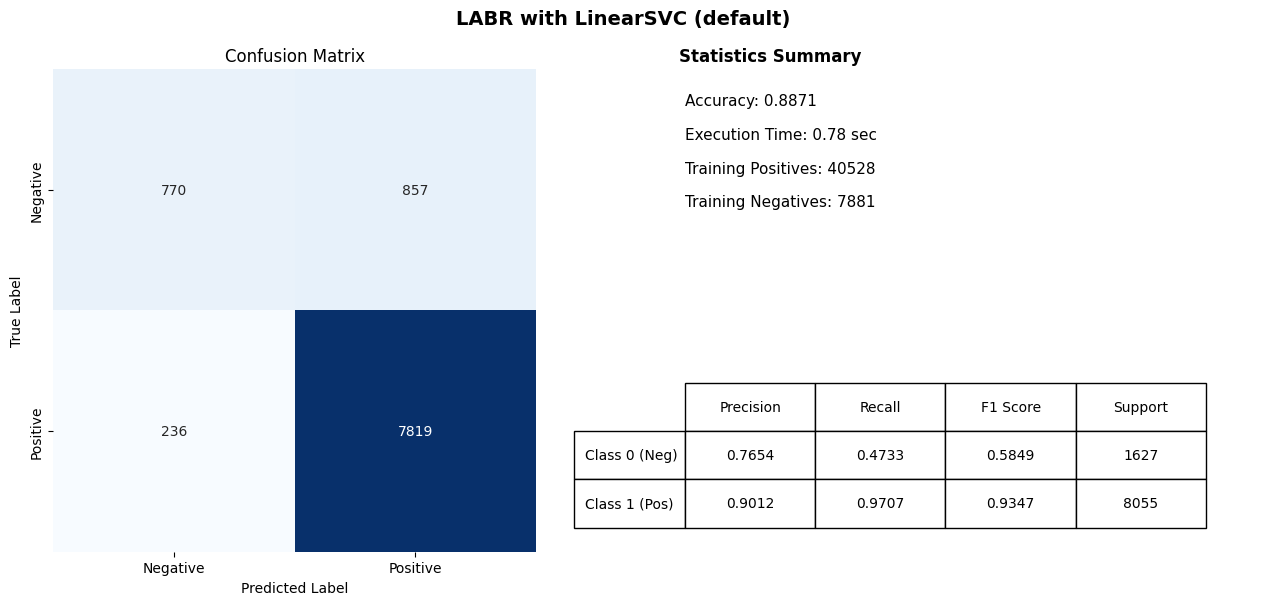


-- Running default model on LABR_Balanced --


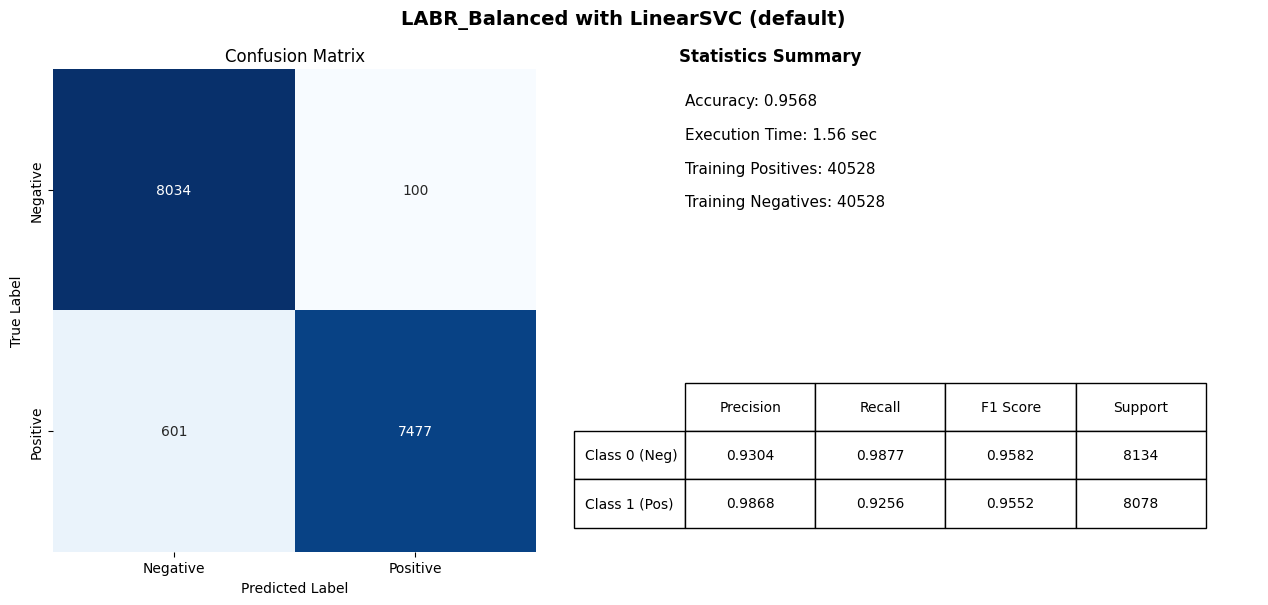


-- Running default model on LABR_Preprocessed --


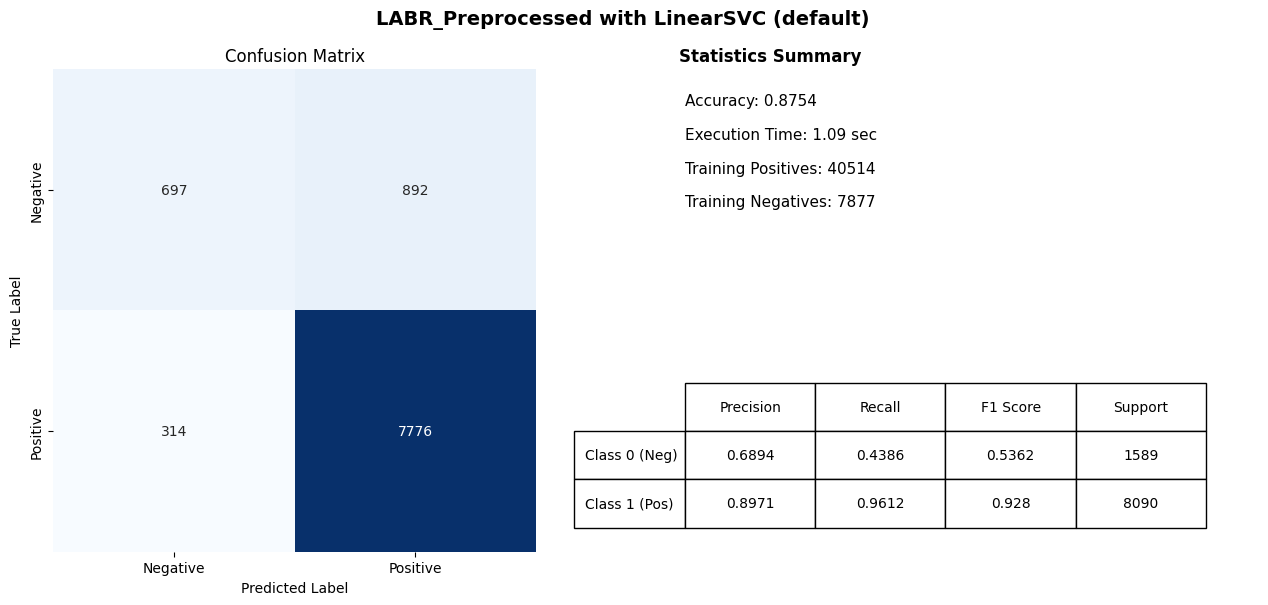


-- Running default model on LABR_Preprocessed_Balanced --


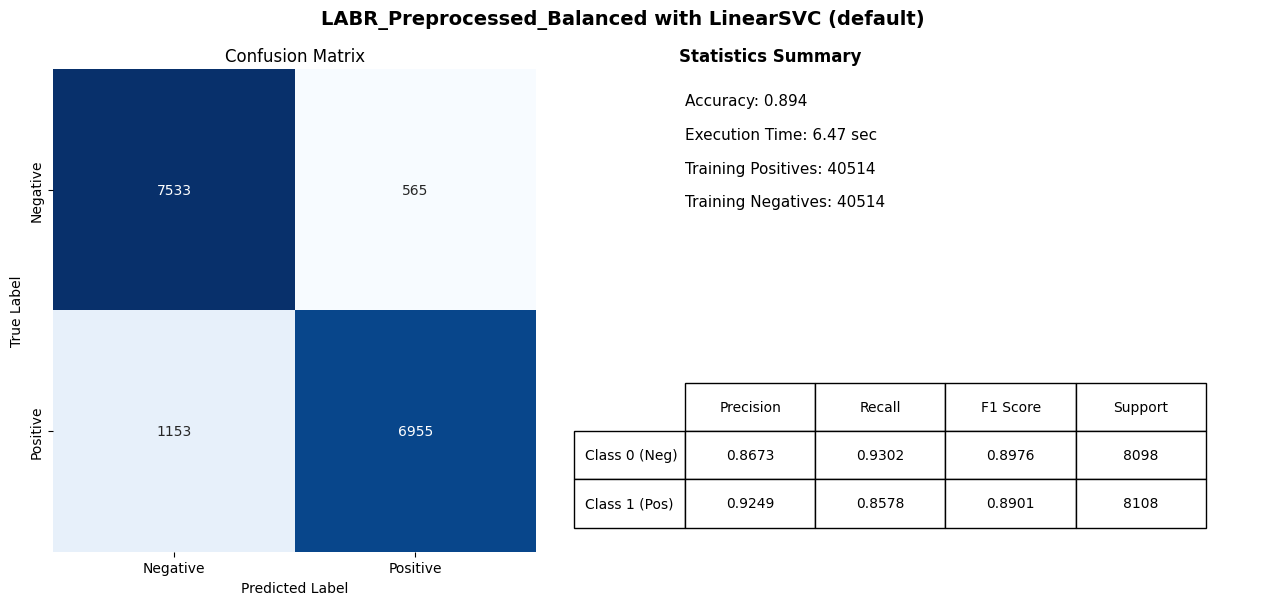


=== Step 2: Tuning C for LinearSVC ===


-- Tuning LABR --



C: 0.001 | F1[0]: 0.0 | F1[1]: 0.9083 | Avg F1: 0.4541 | Time: 0.1983s
C: 0.01 | F1[0]: 0.0231 | F1[1]: 0.9092 | Avg F1: 0.4661 | Time: 0.3271s
C: 0.1 | F1[0]: 0.4318 | F1[1]: 0.9286 | Avg F1: 0.6802 | Time: 0.3152s
C: 0.5 | F1[0]: 0.5649 | F1[1]: 0.9349 | Avg F1: 0.7499 | Time: 0.5212s
C: 1.0 | F1[0]: 0.5849 | F1[1]: 0.9347 | Avg F1: 0.7598 | Time: 0.7696s
C: 2.0 | F1[0]: 0.597 | F1[1]: 0.9337 | Avg F1: 0.7653 | Time: 1.265s
C: 5.0 | F1[0]: 0.5907 | F1[1]: 0.929 | Avg F1: 0.7599 | Time: 2.4965s
C: 10.0 | F1[0]: 0.5826 | F1[1]: 0.9262 | Avg F1: 0.7544 | Time: 6.2554s


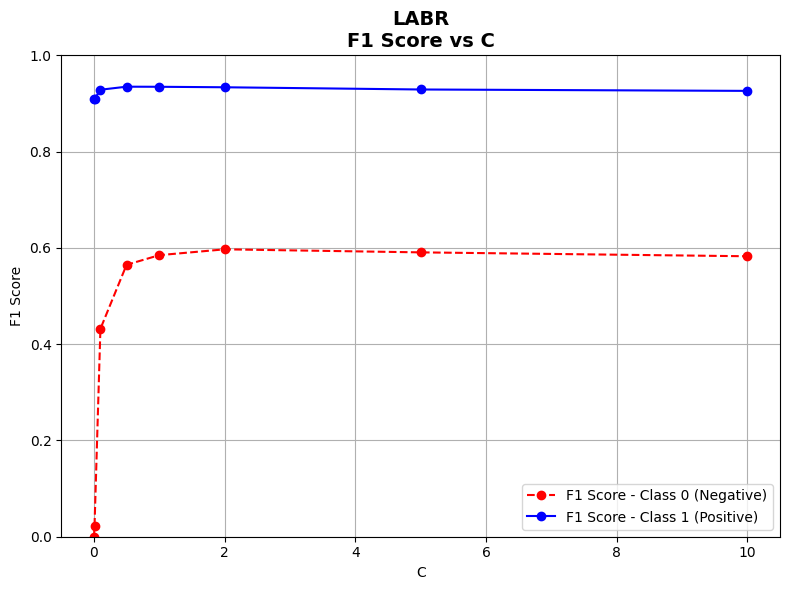


Best C = 2.0 with Avg F1 = 0.7653

-- Tuning LABR_Balanced --



C: 0.001 | F1[0]: 0.7612 | F1[1]: 0.7734 | Avg F1: 0.7673 | Time: 0.4587s
C: 0.01 | F1[0]: 0.8276 | F1[1]: 0.8319 | Avg F1: 0.8297 | Time: 0.6343s
C: 0.1 | F1[0]: 0.9205 | F1[1]: 0.917 | Avg F1: 0.9187 | Time: 0.606s
C: 0.5 | F1[0]: 0.952 | F1[1]: 0.9489 | Avg F1: 0.9505 | Time: 1.0653s
C: 1.0 | F1[0]: 0.9582 | F1[1]: 0.9552 | Avg F1: 0.9567 | Time: 1.6705s
C: 2.0 | F1[0]: 0.9598 | F1[1]: 0.9568 | Avg F1: 0.9583 | Time: 2.9238s
C: 5.0 | F1[0]: 0.9602 | F1[1]: 0.9573 | Avg F1: 0.9587 | Time: 6.8506s
C: 10.0 | F1[0]: 0.9597 | F1[1]: 0.9566 | Avg F1: 0.9581 | Time: 12.057s


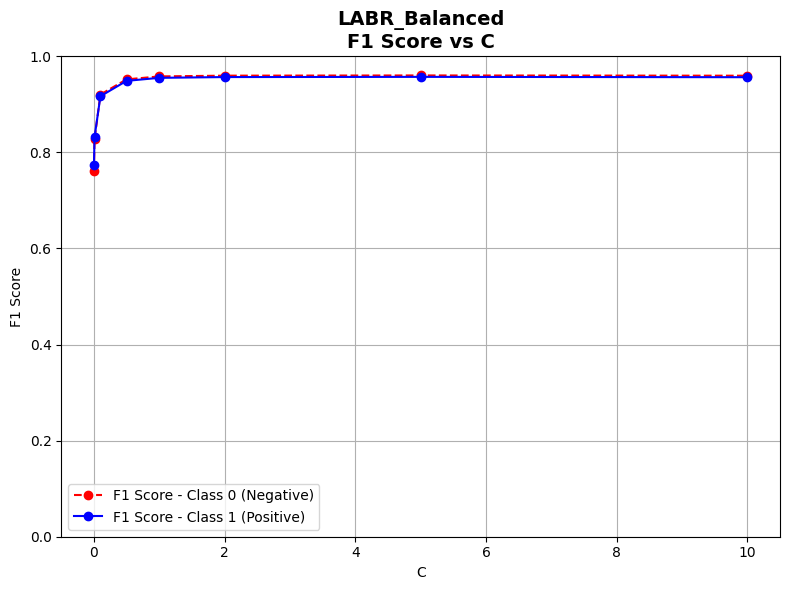


Best C = 5.0 with Avg F1 = 0.9587

-- Tuning LABR_Preprocessed --



C: 0.001 | F1[0]: 0.0 | F1[1]: 0.9106 | Avg F1: 0.4553 | Time: 0.1913s
C: 0.01 | F1[0]: 0.0853 | F1[1]: 0.9139 | Avg F1: 0.4996 | Time: 0.3097s
C: 0.1 | F1[0]: 0.4564 | F1[1]: 0.9302 | Avg F1: 0.6933 | Time: 0.5993s
C: 0.5 | F1[0]: 0.5268 | F1[1]: 0.9299 | Avg F1: 0.7284 | Time: 1.4711s
C: 1.0 | F1[0]: 0.5362 | F1[1]: 0.928 | Avg F1: 0.7321 | Time: 1.1104s
C: 2.0 | F1[0]: 0.5364 | F1[1]: 0.9238 | Avg F1: 0.7301 | Time: 1.1755s
C: 5.0 | F1[0]: 0.5226 | F1[1]: 0.9166 | Avg F1: 0.7196 | Time: 1.9073s
C: 10.0 | F1[0]: 0.5114 | F1[1]: 0.9108 | Avg F1: 0.7111 | Time: 4.0378s


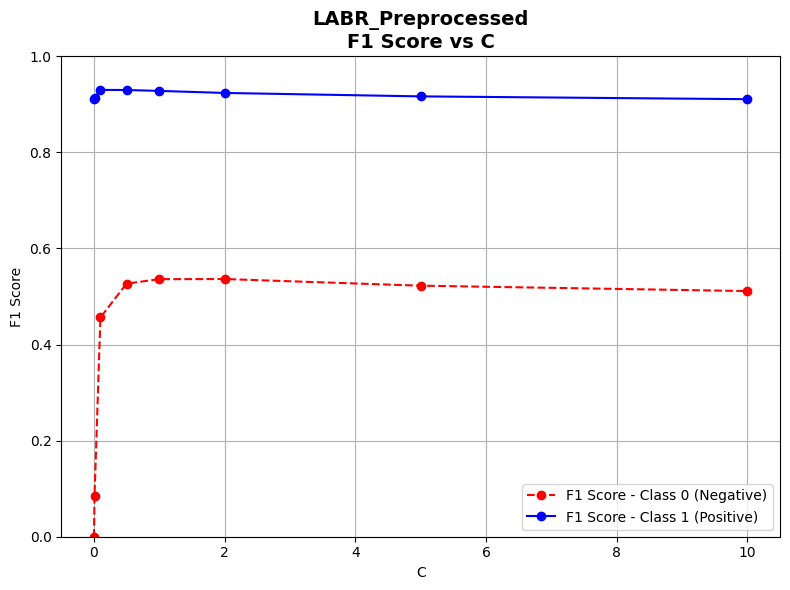


Best C = 1.0 with Avg F1 = 0.7321

-- Tuning LABR_Preprocessed_Balanced --



C: 0.001 | F1[0]: 0.784 | F1[1]: 0.7815 | Avg F1: 0.7827 | Time: 0.5155s
C: 0.01 | F1[0]: 0.8116 | F1[1]: 0.8131 | Avg F1: 0.8124 | Time: 0.7286s
C: 0.1 | F1[0]: 0.8586 | F1[1]: 0.8564 | Avg F1: 0.8575 | Time: 1.6013s
C: 0.5 | F1[0]: 0.8871 | F1[1]: 0.8808 | Avg F1: 0.884 | Time: 3.0308s
C: 1.0 | F1[0]: 0.8976 | F1[1]: 0.8901 | Avg F1: 0.8939 | Time: 5.4267s
C: 2.0 | F1[0]: 0.9033 | F1[1]: 0.8951 | Avg F1: 0.8992 | Time: 6.2564s
C: 5.0 | F1[0]: 0.9071 | F1[1]: 0.8983 | Avg F1: 0.9027 | Time: 11.9659s
C: 10.0 | F1[0]: 0.9069 | F1[1]: 0.8969 | Avg F1: 0.9019 | Time: 18.0533s


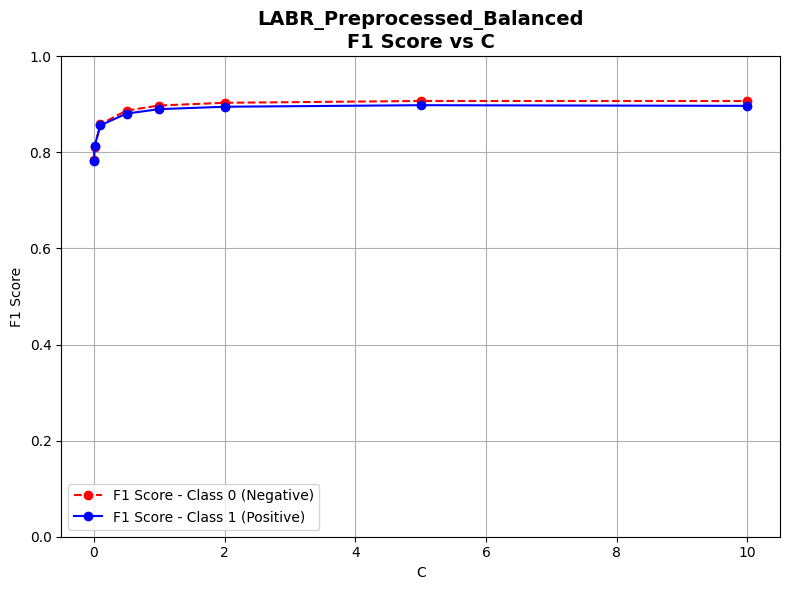


Best C = 5.0 with Avg F1 = 0.9027

=== Step 3: LinearSVC with BEST C ===


-- LABR with best C = 2.0 --


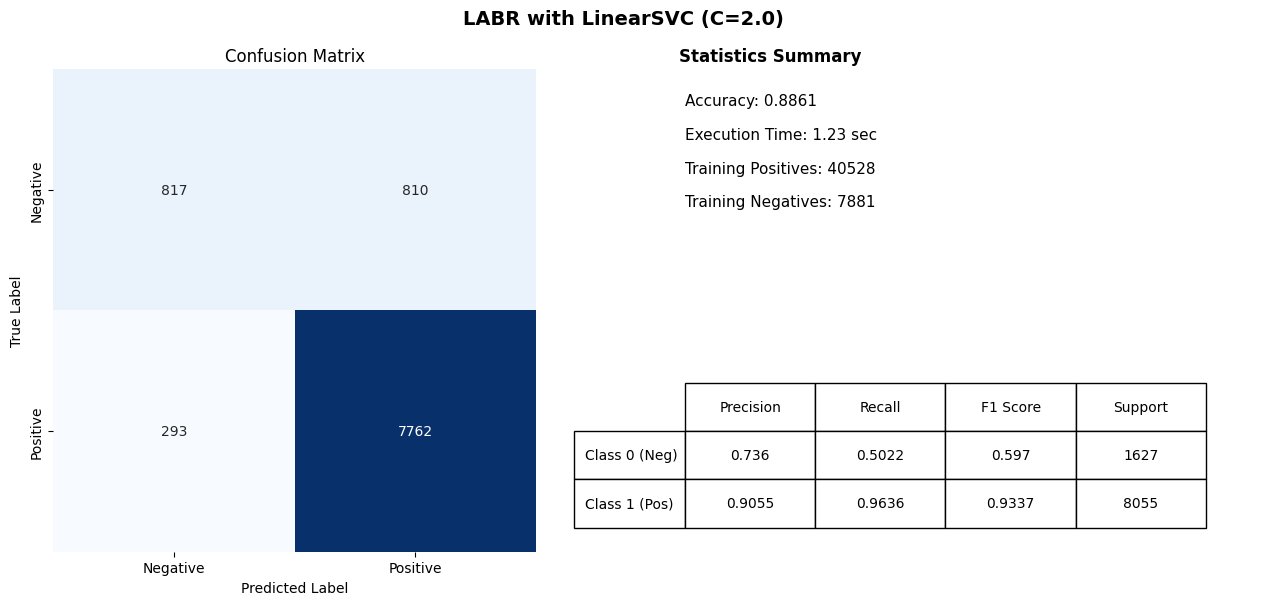


-- LABR_Balanced with best C = 5.0 --


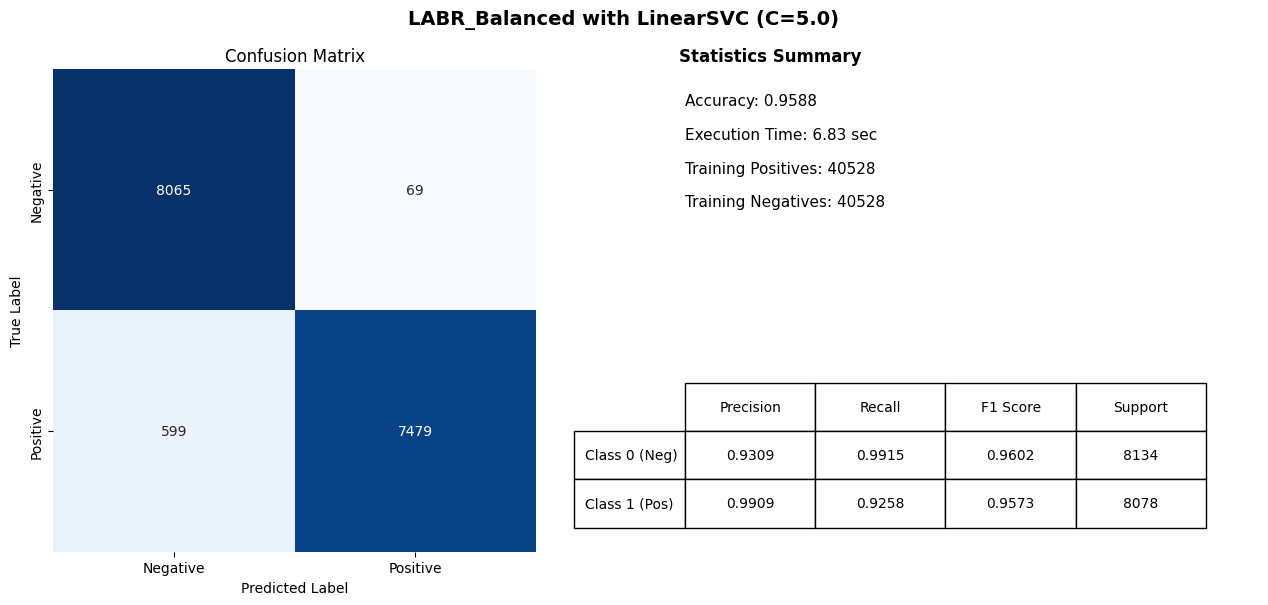


-- LABR_Preprocessed with best C = 1.0 --


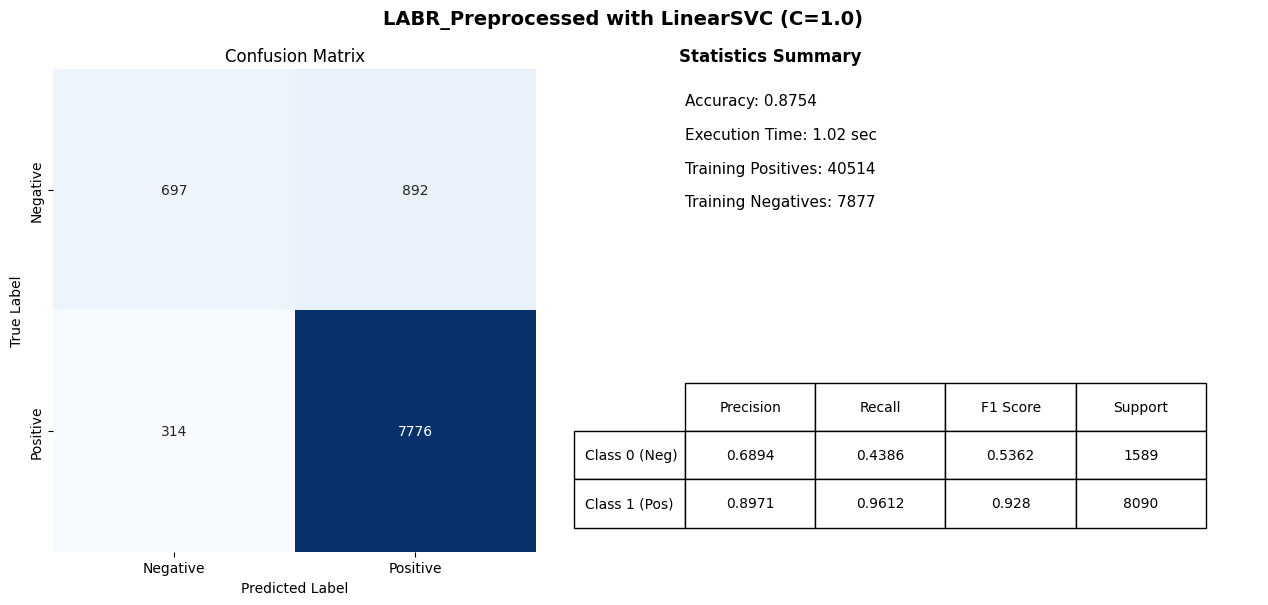


-- LABR_Preprocessed_Balanced with best C = 5.0 --


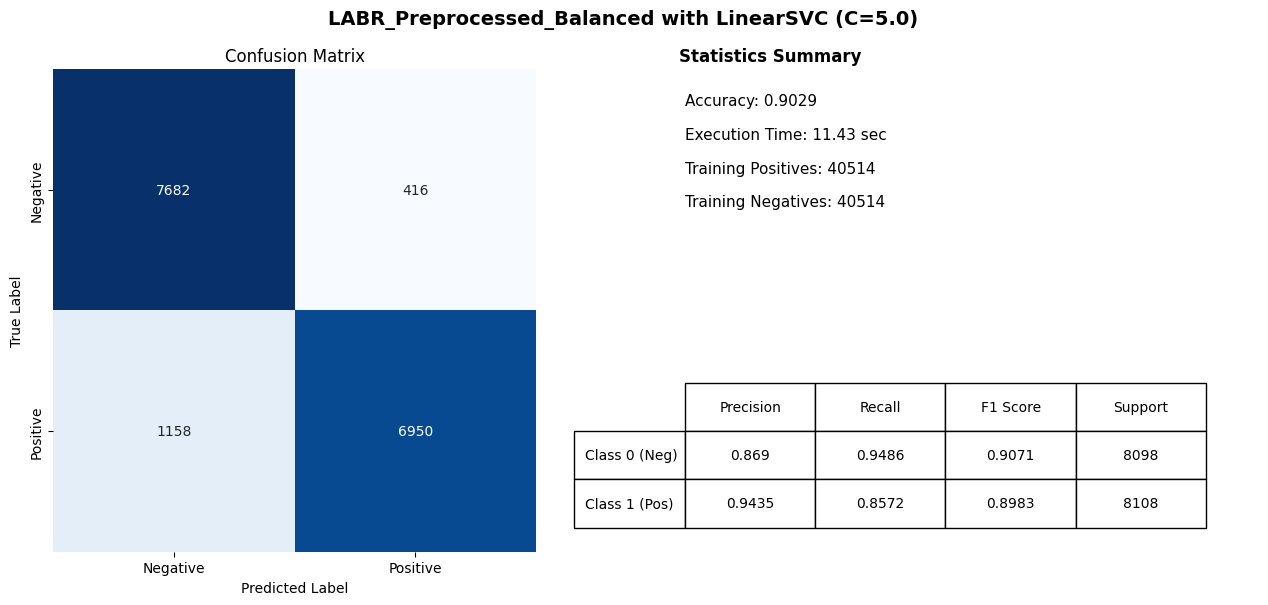

Results saved to 'LinearSVC_Results.csv'


In [10]:
from sklearn.svm import LinearSVC

param_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_LinearSVC_results = []

# === Step 1: LinearSVC with default C
print("\n=== Step 1: LinearSVC with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        model_name="LinearSVC (default)",
        dataset_name=label
    )
    result["Model Group"] = "LinearSVC"
    all_LinearSVC_results.append(result)

# === Step 2: Hyperparameter tuning (C)
print("\n=== Step 2: Tuning C for LinearSVC ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_C = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        param_name="C",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_C

# === Step 3: Evaluate with best C
print("\n=== Step 3: LinearSVC with BEST C ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_C = best_params[label]
    print(f"\n-- {label} with best C = {best_C} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        model_name=f"LinearSVC (C={best_C})",
        dataset_name=label,
        model_params={"C": best_C}
    )
    result["Model Group"] = "LinearSVC"
    all_LinearSVC_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_LinearSVC_results)
results_df.to_csv("LinearSVC_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'LinearSVC_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **SVM (NuSVC)**


=== Step 1: NuSVC with DEFAULT parameters ===


-- Running default model on LABR --


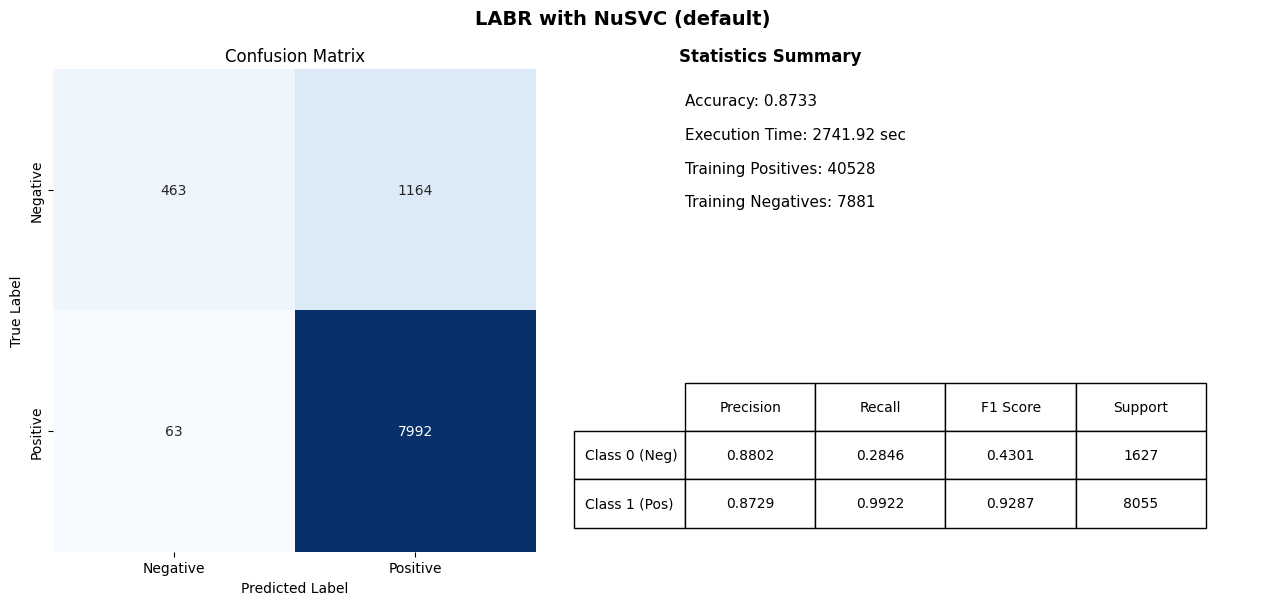


-- Running default model on LABR_Balanced --


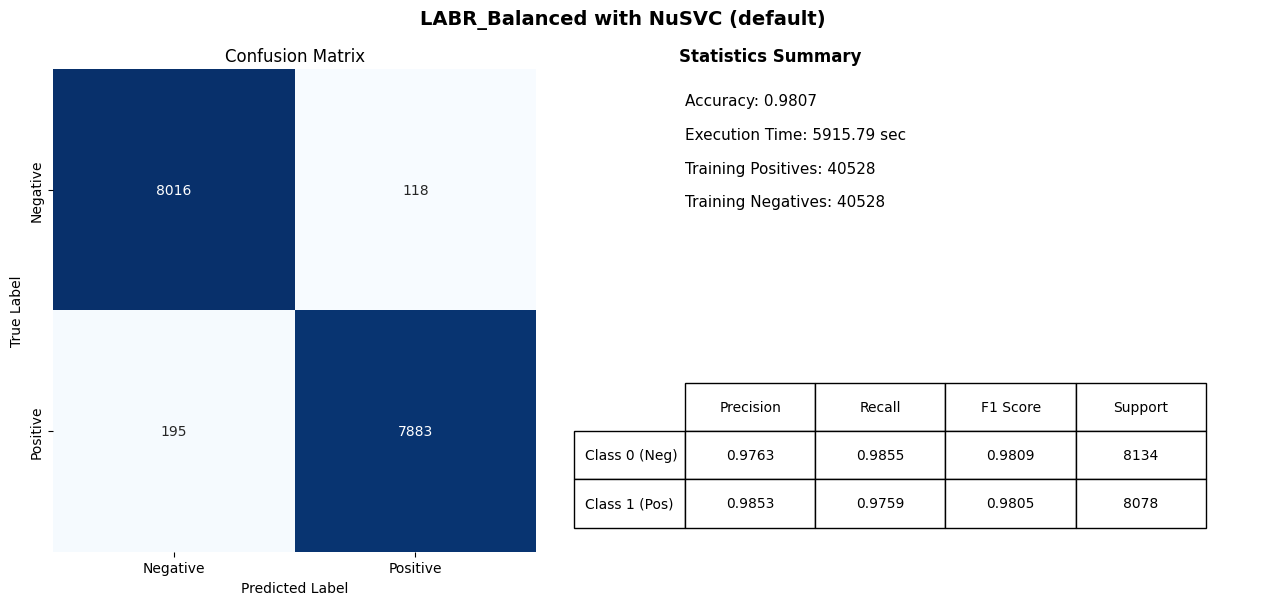


-- Running default model on LABR_Preprocessed --


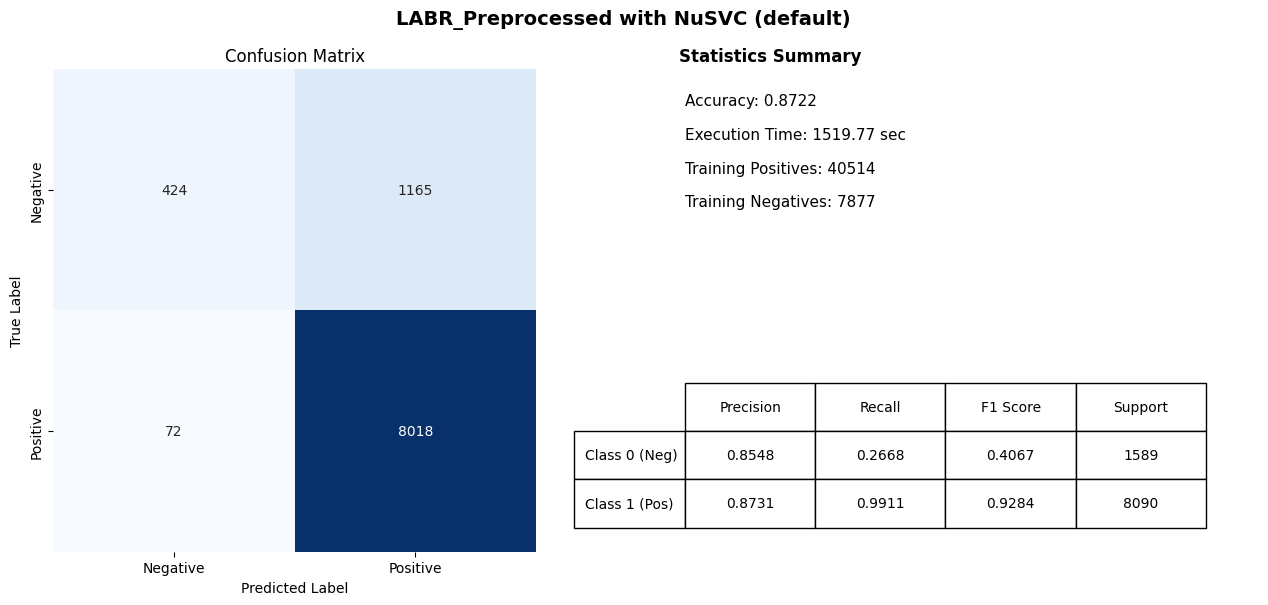


-- Running default model on LABR_Preprocessed_Balanced --


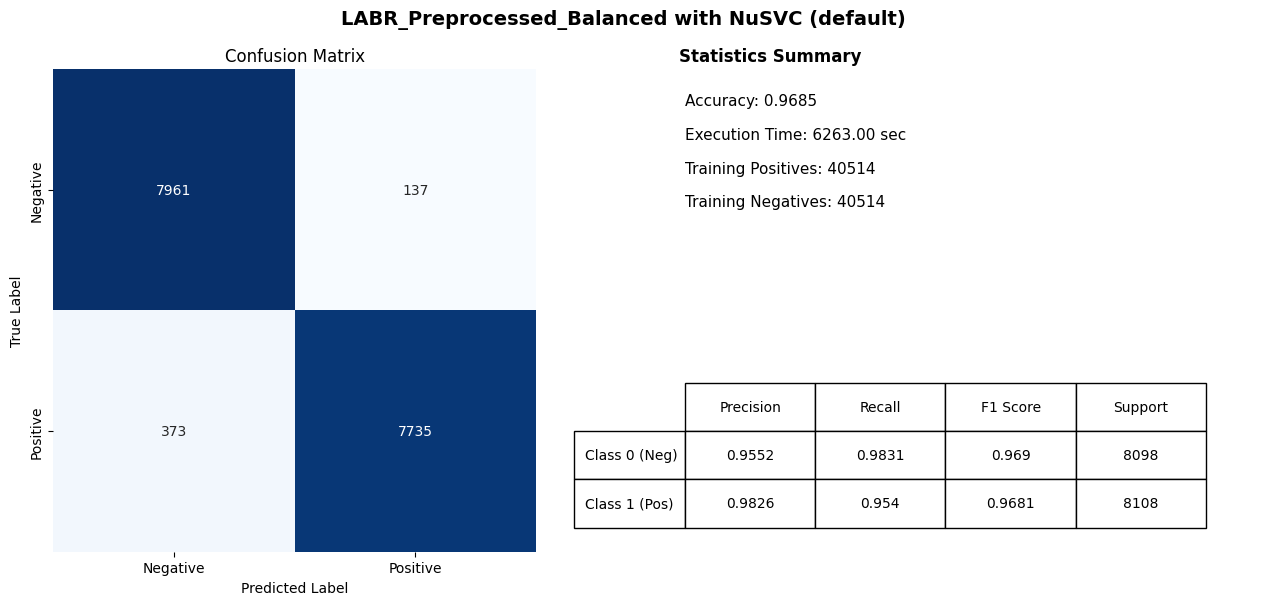


=== Step 2: Tuning nu for NuSVC ===


-- Tuning LABR --



nu: 0.01 | F1[0]: 0.5479 | F1[1]: 0.9348 | Avg F1: 0.7413 | Time: 1719.8374s
nu: 0.1 | F1[0]: 0.5475 | F1[1]: 0.9348 | Avg F1: 0.7412 | Time: 2307.6214s
nu: 0.3 | F1[0]: 0.4301 | F1[1]: 0.9287 | Avg F1: 0.6794 | Time: 2576.4277s
Skipping nu = 0.5 due to error: b'specified nu is infeasible'
Skipping nu = 0.7 due to error: b'specified nu is infeasible'
Skipping nu = 0.9 due to error: b'specified nu is infeasible'


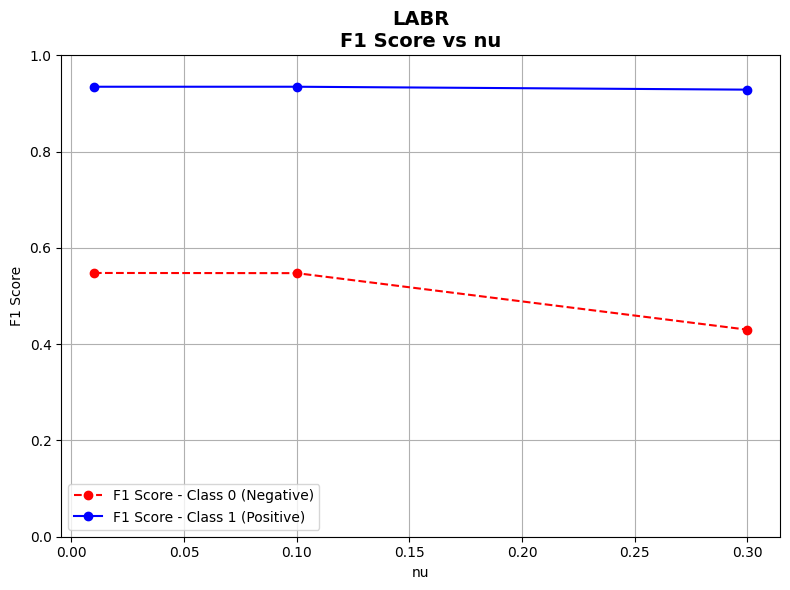


Best nu = 0.01 with Avg F1 = 0.7413

-- Tuning LABR_Balanced --



nu: 0.01 | F1[0]: 0.9834 | F1[1]: 0.983 | Avg F1: 0.9832 | Time: 3544.3731s
nu: 0.1 | F1[0]: 0.9831 | F1[1]: 0.9827 | Avg F1: 0.9829 | Time: 4622.804s
nu: 0.3 | F1[0]: 0.9809 | F1[1]: 0.9805 | Avg F1: 0.9807 | Time: 6043.6113s


In [ ]:
from sklearn.svm import NuSVC

param_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
best_params = {}
all_NuSVC_results = []

# === Step 1: NuSVC with default Nu
print("\n=== Step 1: NuSVC with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        model_name="NuSVC (default)",
        dataset_name=label,
        model_params={"nu": 0.3}
    )
    result["Model Group"] = "NuSVC"
    all_NuSVC_results.append(result)

# === Step 2: Hyperparameter tuning (nu)
print("\n=== Step 2: Tuning nu for NuSVC ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_nu = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        param_name="nu",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_nu

# === Step 3: Evaluate with best nu
print("\n=== Step 3: NuSVC with BEST nu ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_nu = best_params[label]
    print(f"\n-- {label} with best nu = {best_nu} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        model_name=f"NuSVC (nu={best_nu})",
        dataset_name=label,
        model_params={"nu": best_nu}
    )
    result["Model Group"] = "NuSVC"
    all_NuSVC_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_NuSVC_results)
results_df.to_csv("NuSVC_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'NuSVC_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

param_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_LR_results = []

# === Step 1: Logistic Regression with default C
print("\n=== Step 1: LogisticRegression with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        model_name="LogisticRegression (default)",
        dataset_name=label,
        model_params={"max_iter": 1000}
    )
    result["Model Group"] = "LogisticRegression"
    all_LR_results.append(result)

# === Step 2: Hyperparameter tuning (C)
print("\n=== Step 2: Tuning C for LogisticRegression ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_C = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        param_name="C",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_C

# === Step 3: Evaluate with best C
print("\n=== Step 3: LogisticRegression with BEST C ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_C = best_params[label]
    print(f"\n-- {label} with best C = {best_C} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        model_name=f"LogisticRegression (C={best_C})",
        dataset_name=label,
        model_params={"C": best_C, "max_iter": 1000}
    )
    result["Model Group"] = "LogisticRegression"
    all_LR_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_LR_results)
results_df.to_csv("LogisticRegression_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'LogisticRegression_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)



## **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_values = [10, 50, 100, 200, 300, 500]
best_params = {}
all_RF_results = []

# === Step 1: RandomForest with default n_estimators
print("\n=== Step 1: RandomForestClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        model_name="RandomForest (default)",
        dataset_name=label
    )
    result["Model Group"] = "RandomForest"
    all_RF_results.append(result)

# === Step 2: Hyperparameter tuning (n_estimators)
print("\n=== Step 2: Tuning n_estimators for RandomForest ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_n = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        param_name="n_estimators",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_n

# === Step 3: Evaluation with best n_estimators
print("\n=== Step 3: RandomForestClassifier with BEST n_estimators ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_n = best_params[label]
    print(f"\n-- {label} with best n_estimators = {best_n} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        model_name=f"RandomForest (n_estimators={best_n})",
        dataset_name=label,
        model_params={"n_estimators": best_n}
    )
    result["Model Group"] = "RandomForest"
    all_RF_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_RF_results)
results_df.to_csv("RandomForest_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'RandomForest_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_values = [1, 3, 5, 7, 9, 11, 15, 17, 19]
best_params = {}
all_KNN_results = []

# === Step 1: KNN with default n_neighbors
print("\n=== Step 1: KNeighborsClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        model_name="KNN (default)",
        dataset_name=label
    )
    result["Model Group"] = "KNN"
    all_KNN_results.append(result)

# === Step 2: Tuning n_neighbors
print("\n=== Step 2: Tuning n_neighbors for KNN ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_k = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        param_name="n_neighbors",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_k

# === Step 3: Evaluation with best k
print("\n=== Step 3: KNN with BEST n_neighbors ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_k = best_params[label]
    print(f"\n-- {label} with best k = {best_k} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        model_name=f"KNN (k={best_k})",
        dataset_name=label,
        model_params={"n_neighbors": best_k}
    )
    result["Model Group"] = "KNN"
    all_KNN_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_KNN_results)
results_df.to_csv("KNN_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'KNN_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

param_values = [10, 50, 100, 200, 300, 500]
best_params = {}
all_ADA_results = []

# === Step 1: AdaBoost with default n_estimators
print("\n=== Step 1: AdaBoostClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        model_name="AdaBoost (default)",
        dataset_name=label
    )
    result["Model Group"] = "AdaBoost"
    all_ADA_results.append(result)

# === Step 2: Hyperparameter tuning (n_estimators)
print("\n=== Step 2: Tuning n_estimators for AdaBoost ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_n = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        param_name="n_estimators",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_n

# === Step 3: Evaluate with best n_estimators
print("\n=== Step 3: AdaBoostClassifier with BEST n_estimators ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_n = best_params[label]
    print(f"\n-- {label} with best n_estimators = {best_n} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        model_name=f"AdaBoost (n_estimators={best_n})",
        dataset_name=label,
        model_params={"n_estimators": best_n}
    )
    result["Model Group"] = "AdaBoost"
    all_ADA_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_ADA_results)
results_df.to_csv("AdaBoost_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'AdaBoost_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)

# **Save All**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_Algo_results.to_csv("All_Algorithms_Results.csv", index=False, encoding="utf-8-sig")

# Load the global results
df = pd.read_csv("All_Algorithms_Results.csv")

# Calculate Avg F1 score
df["Avg_F1"] = (df["F1_0"] + df["F1_1"]) / 2

# Split into before and after tuning
before_opt = df[df["Algorithm"].str.contains("default")]
after_opt = df[~df["Algorithm"].str.contains("default")]

# Define dataset order and color palette
dataset_order = ["LABR", "LABR_Balanced", "LABR_Preprocessed", "LABR_Preprocessed_Balanced"]
dataset_palette = {
    "LABR": "#4c72b0",
    "LABR_Balanced": "#55a868",
    "LABR_Preprocessed": "#c44e52",
    "LABR_Preprocessed_Balanced": "#8172b2"
}

def plot_avg_f1(data, title):
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(
        data=data,
        x="Model Group",
        y="Avg_F1",
        hue="Dataset",
        hue_order=dataset_order,
        palette=dataset_palette
    )

    # Add value labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel("Average F1 Score")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.legend(title="Dataset", loc='lower right')
    plt.tight_layout()
    plt.show()

# Plot before and after optimization
plot_avg_f1(before_opt, "📊 Average F1 Score by Model (Before Hyperparameter Tuning)")
plot_avg_f1(after_opt, "📊 Average F1 Score by Model (After Hyperparameter Tuning)")
